In [1]:
import h5py
import pylab as pl
import numpy as np
import matplotlib.colors as mpc
import networkx
import ipyvolume as ipv
import progressbar
import astropy.cosmology as apc
from sphviewer.tools import QuickView
from sphviewer.tools import Blend
import scipy.stats as sp
import matplotlib.cm as cm

In [2]:
def split_unique_id(unique_id):
    """Splits the ids assign to the subhalos by the merger tree code by snap number and subfind number """
    subfind_number = int(unique_id % 1e6)
    snap_number = int((unique_id - subfind_number) / 1e6)
    
    return snap_number, subfind_number

def get_main_branch_unique_ids(subtree, node):
    """Gets the unique ids of the subhalos belonging to the main branch of the selected subhalo (node)"""
    mpb = [node, ]
    i = 0
    while True:
        succesors = list(subtree.successors(node))
        if len(succesors) == 0:
            break
        node = succesors[0] # select only the first succesor (main branch)
        mpb.append(node)
        
    return mpb

def get_main_branch_backwards(subtree, node):
    """Gets the unique ids of the subhalos belonging to the main branch of the selected subhalo (node)"""
    mpb = [node, ]
    i = 0
    while True:
        succesors = list(subtree.successors(node))
        if len(succesors) == 0: # i hope this still work
            break
        snap, idd = split_unique_id(int(node))
        snapT = str(snap-1)
        for s in succesors:
            if s.startswith(snapT):
                node = s # select the firts succesor from a previous snapshot
                break
        #node = succesors[0] # select only the first succesor (main branch)
        mpb.append(node)
        
    return mpb

In [3]:
Cosmo = apc.FlatLambdaCDM(H0=100, Om0=0.3175)

In [4]:
pl.rc('font', size = 25)
pl.rc('legend', fontsize = 22)
pl.rc('axes', linewidth=1.5)
#sim = h5py.File('/disk1/data1-casona/data1/cielo/simulations/LG1/LG1.hdf5', 'r')
#trees = networkx.read_multiline_adjlist('/disk1/data1-casona/data1/cielo/simulations/LG1/LG1_tree.dat')
sim = h5py.File('/disk1/lbignone/data/cielo/simulations/LG1/LG1.hdf5', 'r')
trees = networkx.read_multiline_adjlist('/disk1/lbignone/data/cielo/simulations/LG1/LG1_tree.dat')

In [5]:
T = h5py.File('Derived_Data_3.h5', 'r')

dist_4338 = T['g4338/distance'][()]
Time_4338 = T['g4338/time'][()]
cosC_4338 = T['g4338/CosCen'][()]
cosV_4338 = T['g4338/CosVel'][()]
RP_4338 = T['g4338/RP'][()]
TSt_4338 = T['g4338/TSt'][()]
gMass_4338 = T['g4338/gMass'][()]
SFR_4338 = T['g4338/SFR'][()]
starMass_4338 = T['g4338/starMass'][()]
Gas_4338 = T['g4338/Gas'][()]
RestForce_4338 = T['g4338/RestForce'][()]

dist_4339 = T['g4339/distance'][()]
Time_4339 = T['g4339/time'][()]
cosC_4339 = T['g4339/CosCen'][()]
cosV_4339 = T['g4339/CosVel'][()]
RP_4339 = T['g4339/RP'][()]
TSt_4339 = T['g4339/TSt'][()]
gMass_4339 = T['g4339/gMass'][()]
SFR_4339 = T['g4339/SFR'][()]
starMass_4339 = T['g4339/starMass'][()]
Gas_4339 = T['g4339/Gas'][()]
RestForce_4339 = T['g4339/RestForce'][()]

dist_4341 = T['g4341/distance'][()]
Time_4341 = T['g4341/time'][()]
cosC_4341 = T['g4341/CosCen'][()]
cosV_4341 = T['g4341/CosVel'][()]
RP_4341 = T['g4341/RP'][()]
TSt_4341 = T['g4341/TSt'][()]
gMass_4341 = T['g4341/gMass'][()]
SFR_4341 = T['g4341/SFR'][()]
starMass_4341 = T['g4341/starMass'][()]
Gas_4341 = T['g4341/Gas'][()]
RestForce_4341 = T['g4341/RestForce'][()]

dist_4343 = T['g4343/distance'][()]
Time_4343 = T['g4343/time'][()]
cosC_4343 = T['g4343/CosCen'][()]
cosV_4343 = T['g4343/CosVel'][()]
RP_4343 = T['g4343/RP'][()]
TSt_4343 = T['g4343/TSt'][()]
gMass_4343 = T['g4343/gMass'][()]
SFR_4343 = T['g4343/SFR'][()]
starMass_4343 = T['g4343/starMass'][()]
Gas_4343 = T['g4343/Gas'][()]
RestForce_4343 = T['g4343/RestForce'][()]

dist_4470 = T['g4470/distance'][()]
Time_4470 = T['g4470/time'][()]
cosC_4470 = T['g4470/CosCen'][()]
cosV_4470 = T['g4470/CosVel'][()]
RP_4470 = T['g4470/RP'][()]
TSt_4470 = T['g4470/TSt'][()]
gMass_4470 = T['g4470/gMass'][()]
SFR_4470 = T['g4470/SFR'][()]
starMass_4470 = T['g4470/starMass'][()]
Gas_4470 = T['g4470/Gas'][()]
RestForce_4470 = T['g4470/RestForce'][()]

dist_4471 = T['g4471/distance'][()]
Time_4471 = T['g4471/time'][()]
cosC_4471 = T['g4471/CosCen'][()]
cosV_4471 = T['g4471/CosVel'][()]
RP_4471 = T['g4471/RP'][()]
TSt_4471 = T['g4471/TSt'][()]
gMass_4471 = T['g4471/gMass'][()]
SFR_4471 = T['g4471/SFR'][()]
starMass_4471 = T['g4471/starMass'][()]
Gas_4471 = T['g4471/Gas'][()]
RestForce_4471 = T['g4471/RestForce'][()]

dist_4473 = T['g4473/distance'][()]
Time_4473 = T['g4473/time'][()]
cosC_4473 = T['g4473/CosCen'][()]
cosV_4473 = T['g4473/CosVel'][()]
RP_4473 = T['g4473/RP'][()]
TSt_4473 = T['g4473/TSt'][()]
gMass_4473 = T['g4473/gMass'][()]
SFR_4473 = T['g4473/SFR'][()]
starMass_4473 = T['g4473/starMass'][()]
Gas_4473 = T['g4473/Gas'][()]
RestForce_4473 = T['g4473/RestForce'][()]

dist_4474 = T['g4474/distance'][()]
Time_4474 = T['g4474/time'][()]
cosC_4474 = T['g4474/CosCen'][()]
cosV_4474 = T['g4474/CosVel'][()]
RP_4474 = T['g4474/RP'][()]
TSt_4474 = T['g4474/TSt'][()]
gMass_4474 = T['g4474/gMass'][()]
SFR_4474 = T['g4474/SFR'][()]
starMass_4474 = T['g4474/starMass'][()]
Gas_4474 = T['g4474/Gas'][()]
RestForce_4474 = T['g4474/RestForce'][()]

In [6]:
# ok, max values of things and tiem of maximum, then deltas
def getMax(time, sfr, rp, tt, gas):
    print(time.min(), time.max())
    iS = np.where(sfr==sfr.max())[0][0]
    print('sSFR:', time[iS], sfr[iS], '1/yr')
    iR = np.where(rp==rp.max())[0][0]
    print('Ram pressure', time[iR], rp[iR], 'Pa')
    iT = np.where(tt==tt.max())[0][0]
    print('Tidal torque', time[iT], tt[iT], 'km^2/s^2')
    iG = np.where(gas==gas.max())[0][0]
    print('Masa', time[iG], np.log10(gas[iG]), 'M_{\sun}')

In [7]:
getMax(Time_4338, SFR_4338/starMass_4338, RP_4338, TSt_4338/gMass_4338, Gas_4338)

1.7763568394002505e-15 2.6647634521790486
sSFR: 1.5657101114473129 2.8044182936575538e-09 1/yr
Ram pressure 1.5657101114473129 2.70530230995766e-16 Pa
Tidal torque 1.6763876468051997 469.01282385682407 km^2/s^2
Masa 1.4548682462509532 8.746026 M_{\sun}


In [8]:
getMax(Time_4339, SFR_4339/starMass_4339, RP_4339, TSt_4339/gMass_4339, Gas_4339)

1.7763568394002505e-15 4.384927460304352
sSFR: 4.278857722902448 1.8501293728998642e-09 1/yr
Ram pressure 3.852645437397169 1.6603142532523514e-15 Pa
Tidal torque 4.0661384219734975 449.5522663537272 km^2/s^2
Masa 3.9594886087537065 8.144402 M_{\sun}


In [9]:
getMax(Time_4341, SFR_4341/starMass_4341, RP_4341, TSt_4341/gMass_4341, Gas_4341)

1.7763568394002505e-15 2.6647634521790486
sSFR: 1.7868988982033889 1.1661257342662942e-08 1/yr
Ram pressure 1.7868988982033889 2.1191432134021942e-16 Pa
Tidal torque 1.7868988982033889 515.7413285503579 km^2/s^2
Masa 1.7868988982033889 8.195036 M_{\sun}


In [10]:
getMax(Time_4343, SFR_4343/starMass_4343, RP_4343, TSt_4343/gMass_4343, Gas_4343)

1.7763568394002505e-15 4.807283485971862
sSFR: 4.0661384219734975 1.2156481234032642e-09 1/yr
Ram pressure 4.0661384219734975 4.611909634030431e-16 Pa
Tidal torque 0.4502672070173688 272.40123145606236 km^2/s^2
Masa 1.6763876468051997 7.972285 M_{\sun}


In [11]:
getMax(Time_4470, SFR_4470/starMass_4470, RP_4470, TSt_4470/gMass_4470, Gas_4470)

1.7763568394002505e-15 3.852645437397169
sSFR: 3.63838003493733 1.8769124385297088e-09 1/yr
Ram pressure 1.7763568394002505e-15 5.827975297568722e-17 Pa
Tidal torque 1.3438643250070612 290.7177586635648 km^2/s^2
Masa 3.745609113380149 9.0528345 M_{\sun}


In [12]:
getMax(Time_4471, SFR_4471/starMass_4471, RP_4471, TSt_4471/gMass_4471, Gas_4471)

1.7763568394002505e-15 3.63838003493733
sSFR: 0.4502672070173688 8.486097687599343e-10 1/yr
Ram pressure 2.6647634521790486 1.179905733525932e-16 Pa
Tidal torque 2.6647634521790486 414.6025141031777 km^2/s^2
Masa 3.099364460421251 9.327275 M_{\sun}


In [13]:
getMax(Time_4473, SFR_4473/starMass_4473, RP_4473, TSt_4473/gMass_4473, Gas_4473)

1.7763568394002505e-15 2.227239684733364
sSFR: 0.6745618951264998 3.598089048332326e-10 1/yr
Ram pressure 1.2327005067006542 9.358062924239774e-17 Pa
Tidal torque 0.8982720123593371 98.64371829117981 km^2/s^2
Masa 0.6745618951264998 7.16239 M_{\sun}


In [14]:
getMax(Time_4474, SFR_4474/starMass_4474, RP_4474, TSt_4474/gMass_4474, Gas_4474)

1.7763568394002505e-15 3.4233456201313173
sSFR: 2.336889135846648 9.145548030807504e-10 1/yr
Ram pressure 2.4463607682802113 2.7801881527843945e-16 Pa
Tidal torque 2.555652731866651 107.08624408676609 km^2/s^2
Masa 2.007414043929286 8.20842 M_{\sun}


In [15]:
# anyway, Deltas

DeltaRP_4338 = RP_4338[:-1] - RP_4338[1:]
DeltaTT_4338 = TSt_4338[:-1]/gMass_4338[:-1] - TSt_4338[1:]/gMass_4338[1:]
DeltaSFR_4338 = SFR_4338[:-1]/starMass_4338[:-1] - SFR_4338[1:]/starMass_4338[1:]
DeltaMass_4338 = Gas_4338[:-1] - Gas_4338[1:]

DeltaRP_4339 = RP_4339[:-1] - RP_4339[1:]
DeltaTT_4339 = TSt_4339[:-1]/gMass_4339[:-1] - TSt_4339[1:]/gMass_4339[1:]
DeltaSFR_4339 = SFR_4339[:-1]/starMass_4339[:-1] - SFR_4339[1:]/starMass_4339[1:]
DeltaMass_4339 = Gas_4339[:-1] - Gas_4339[1:]

DeltaRP_4341 = RP_4341[:-1] - RP_4341[1:]
DeltaTT_4341 = TSt_4341[:-1]/gMass_4341[:-1] - TSt_4341[1:]/gMass_4341[1:]
DeltaSFR_4341 = SFR_4341[:-1]/starMass_4341[:-1] - SFR_4341[1:]/starMass_4341[1:]
DeltaMass_4341 = Gas_4341[:-1] - Gas_4341[1:]

DeltaRP_4343 = RP_4343[:-1] - RP_4343[1:]
DeltaTT_4343 = TSt_4343[:-1]/gMass_4343[:-1] - TSt_4343[1:]/gMass_4343[1:]
DeltaSFR_4343 = SFR_4343[:-1]/starMass_4343[:-1] - SFR_4343[1:]/starMass_4343[1:]
DeltaMass_4343 = Gas_4343[:-1] - Gas_4343[1:]

In [16]:
DeltaRP_4470 = RP_4470[:-1] - RP_4470[1:]
DeltaTT_4470 = TSt_4470[:-1]/gMass_4470[:-1] - TSt_4470[1:]/gMass_4470[1:]
DeltaSFR_4470 = SFR_4470[:-1]/starMass_4470[:-1] - SFR_4470[1:]/starMass_4470[1:]
DeltaMass_4470 = Gas_4470[:-1] - Gas_4470[1:]

DeltaRP_4471 = RP_4471[:-1] - RP_4471[1:]
DeltaTT_4471 = TSt_4471[:-1]/gMass_4471[:-1] - TSt_4471[1:]/gMass_4471[1:]
DeltaSFR_4471 = SFR_4471[:-1]/starMass_4471[:-1] - SFR_4471[1:]/starMass_4471[1:]
DeltaMass_4471 = Gas_4471[:-1] - Gas_4471[1:]

DeltaRP_4473 = RP_4473[:-1] - RP_4473[1:]
DeltaTT_4473 = TSt_4473[:-1]/gMass_4473[:-1] - TSt_4473[1:]/gMass_4473[1:]
DeltaSFR_4473 = SFR_4473[:-1]/starMass_4473[:-1] - SFR_4473[1:]/starMass_4473[1:]
DeltaMass_4473 = Gas_4473[:-1] - Gas_4473[1:]

DeltaRP_4474 = RP_4474[:-1] - RP_4474[1:]
DeltaTT_4474 = TSt_4474[:-1]/gMass_4474[:-1] - TSt_4474[1:]/gMass_4474[1:]
DeltaSFR_4474 = SFR_4474[:-1]/starMass_4474[:-1] - SFR_4474[1:]/starMass_4474[1:]
DeltaMass_4474 = Gas_4474[:-1] - Gas_4474[1:]

Text(0, 0.5, '$\\Delta$ Lost Gas/$M_{\\odot}$ h$^{-1}$')

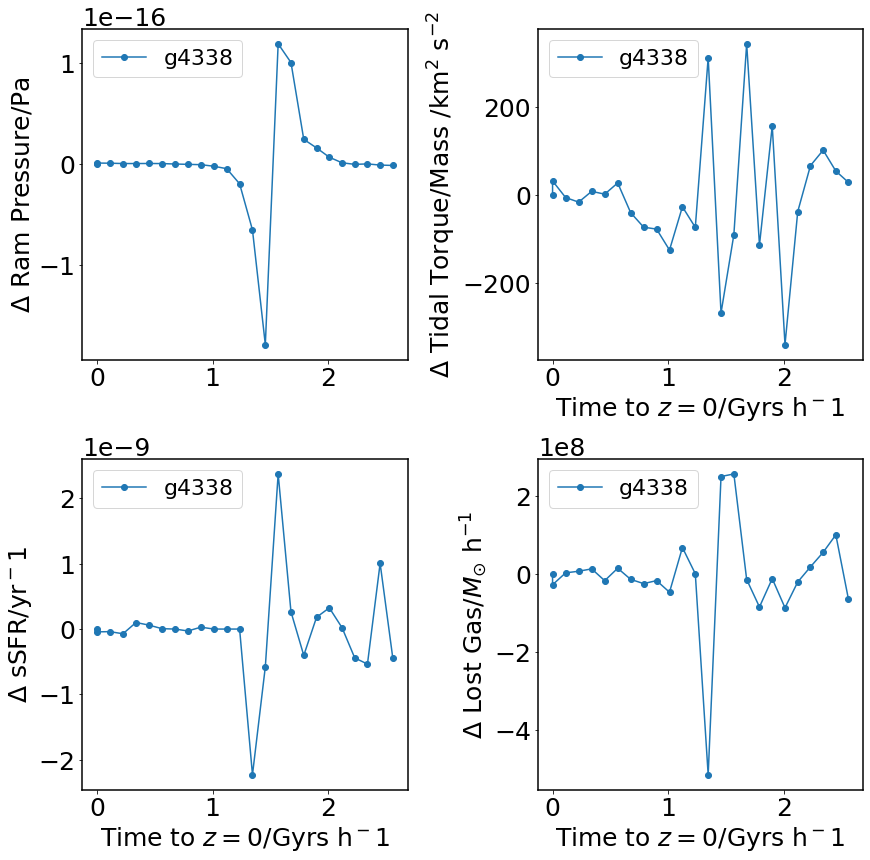

In [17]:
# and plots
pl.figure(figsize=(14,14))

pl.subplots_adjust(wspace=0.4, hspace=0.3)

pl.subplot(2, 2, 1)
pl.plot(Time_4338[:-1], DeltaRP_4338, marker='o', ls='-', label='g4338', color='tab:blue')
pl.legend(loc='best')
pl.ylabel('$\Delta$ Ram Pressure/Pa')

pl.subplot(2, 2, 2)
pl.plot(Time_4338[:-1], DeltaTT_4338, marker='o', ls='-', label='g4338', color='tab:blue')
pl.legend(loc='best')
pl.ylabel('$\Delta$ Tidal Torque/Mass /km$^{2}$ s$^{-2}$')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')

pl.subplot(2, 2, 3)
pl.plot(Time_4338[:-1], DeltaSFR_4338, marker='o', ls='-', label='g4338', color='tab:blue')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('$\Delta$ sSFR/yr$^-1$')


pl.subplot(2, 2, 4)
pl.plot(Time_4338[:-1], DeltaMass_4338, marker='o', ls='-', label='g4338', color='tab:blue')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('$\Delta$ Lost Gas/$M_{\odot}$ h$^{-1}$')


Text(0, 0.5, '$\\Delta$ Lost Gas/$M_{\\odot}$ h$^{-1}$')

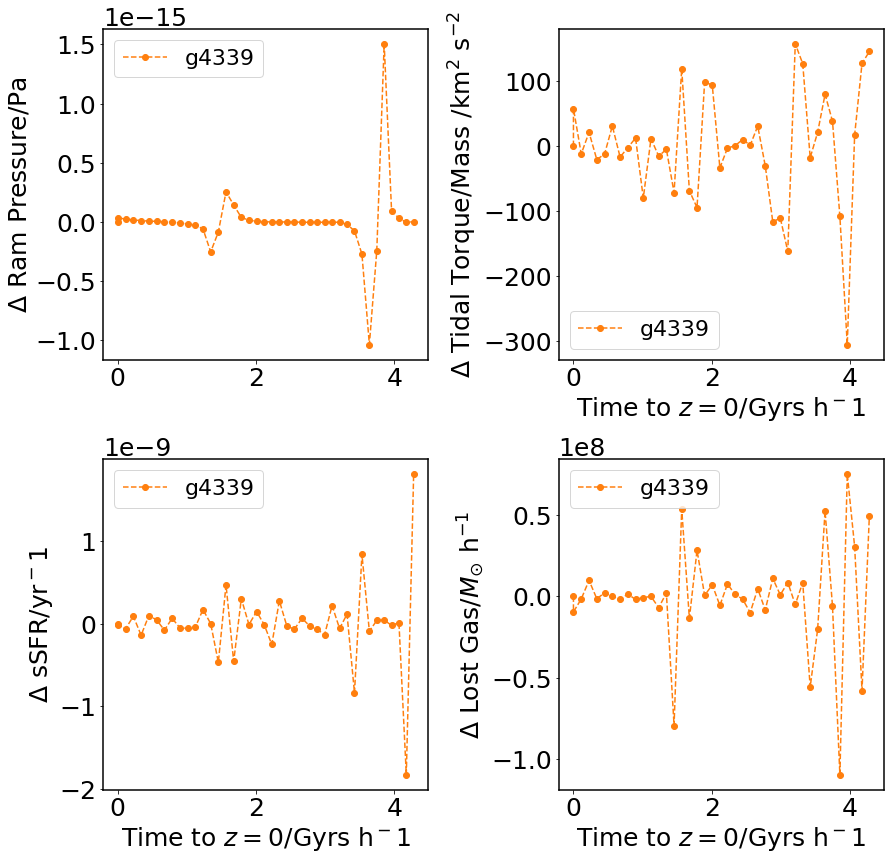

In [18]:
pl.figure(figsize=(14,14))

pl.subplots_adjust(wspace=0.4, hspace=0.3)

pl.subplot(2, 2, 1)
pl.plot(Time_4339[:-1], DeltaRP_4339, marker='o', ls='--', label='g4339', color='tab:orange')
pl.legend(loc='best')
pl.ylabel('$\Delta$ Ram Pressure/Pa')

pl.subplot(2, 2, 2)
pl.plot(Time_4339[:-1], DeltaTT_4339, marker='o', ls='--', label='g4339', color='tab:orange')
pl.legend(loc='best')
pl.ylabel('$\Delta$ Tidal Torque/Mass /km$^{2}$ s$^{-2}$')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')

pl.subplot(2, 2, 3)
pl.plot(Time_4339[:-1], DeltaSFR_4339, marker='o', ls='--', label='g4339', color='tab:orange')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('$\Delta$ sSFR/yr$^-1$')


pl.subplot(2, 2, 4)
pl.plot(Time_4339[:-1], DeltaMass_4339, marker='o', ls='--', label='g4339', color='tab:orange')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('$\Delta$ Lost Gas/$M_{\odot}$ h$^{-1}$')


Text(0, 0.5, '$\\Delta$ Lost Gas/$M_{\\odot}$ h$^{-1}$')

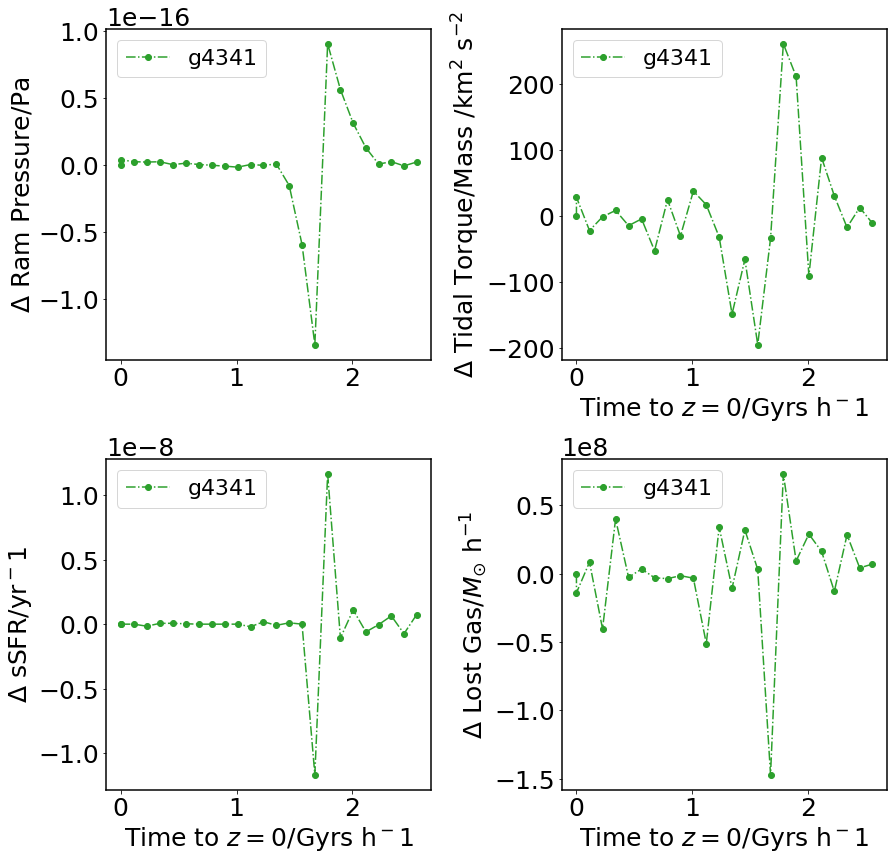

In [19]:
pl.figure(figsize=(14,14))

pl.subplots_adjust(wspace=0.4, hspace=0.3)

pl.subplot(2, 2, 1)
pl.plot(Time_4341[:-1], DeltaRP_4341, marker='o', ls='-.', label='g4341', color='tab:green')
pl.legend(loc='best')
pl.ylabel('$\Delta$ Ram Pressure/Pa')

pl.subplot(2, 2, 2)
pl.plot(Time_4341[:-1], DeltaTT_4341, marker='o', ls='-.', label='g4341', color='tab:green')
pl.legend(loc='best')
pl.ylabel('$\Delta$ Tidal Torque/Mass /km$^{2}$ s$^{-2}$')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')

pl.subplot(2, 2, 3)
pl.plot(Time_4341[:-1], DeltaSFR_4341, marker='o', ls='-.', label='g4341', color='tab:green')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('$\Delta$ sSFR/yr$^-1$')


pl.subplot(2, 2, 4)
pl.plot(Time_4341[:-1], DeltaMass_4341, marker='o', ls='-.', label='g4341', color='tab:green')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('$\Delta$ Lost Gas/$M_{\odot}$ h$^{-1}$')

Text(0, 0.5, '$\\Delta$ Lost Gas/$M_{\\odot}$ h$^{-1}$')

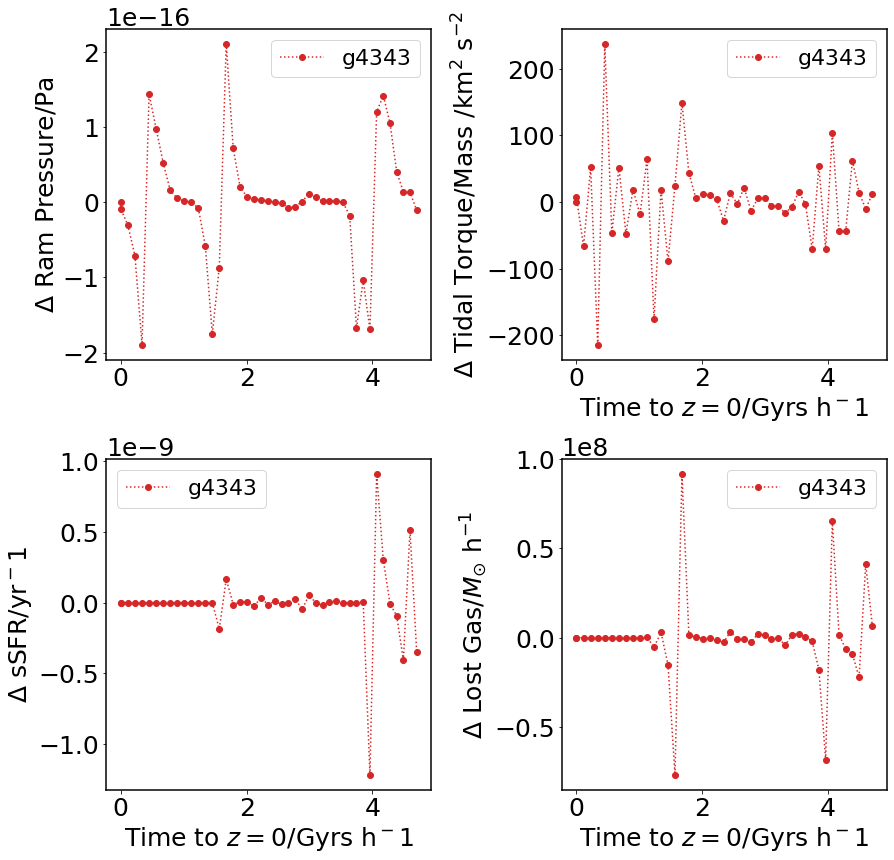

In [20]:
pl.figure(figsize=(14,14))

pl.subplots_adjust(wspace=0.4, hspace=0.3)

pl.subplot(2, 2, 1)
pl.plot(Time_4343[:-1], DeltaRP_4343, marker='o', ls=':', label='g4343', color='tab:red')
pl.legend(loc='best')
pl.ylabel('$\Delta$ Ram Pressure/Pa')

pl.subplot(2, 2, 2)
pl.plot(Time_4343[:-1], DeltaTT_4343, marker='o', ls=':', label='g4343', color='tab:red')
pl.legend(loc='best')
pl.ylabel('$\Delta$ Tidal Torque/Mass /km$^{2}$ s$^{-2}$')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')

pl.subplot(2, 2, 3)
pl.plot(Time_4343[:-1], DeltaSFR_4343, marker='o', ls=':', label='g4343', color='tab:red')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('$\Delta$ sSFR/yr$^-1$')


pl.subplot(2, 2, 4)
pl.plot(Time_4343[:-1], DeltaMass_4343, marker='o', ls=':', label='g4343', color='tab:red')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('$\Delta$ Lost Gas/$M_{\odot}$ h$^{-1}$')

Text(0, 0.5, '$\\Delta$ Lost Gas/$M_{\\odot}$ h$^{-1}$')

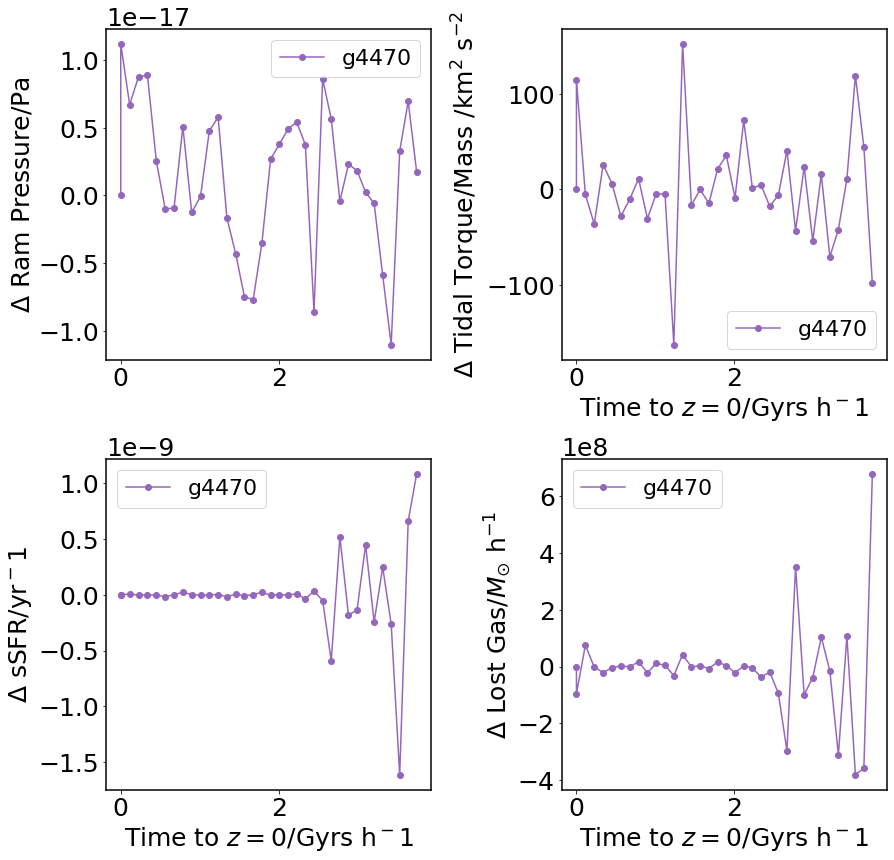

In [21]:
pl.figure(figsize=(14,14))

pl.subplots_adjust(wspace=0.4, hspace=0.3)

pl.subplot(2, 2, 1)
pl.plot(Time_4470[:-1], DeltaRP_4470, marker='o', ls='-', label='g4470', color='tab:purple')
pl.legend(loc='best')
pl.ylabel('$\Delta$ Ram Pressure/Pa')

pl.subplot(2, 2, 2)
pl.plot(Time_4470[:-1], DeltaTT_4470, marker='o', ls='-', label='g4470', color='tab:purple')
pl.legend(loc='best')
pl.ylabel('$\Delta$ Tidal Torque/Mass /km$^{2}$ s$^{-2}$')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')

pl.subplot(2, 2, 3)
pl.plot(Time_4470[:-1], DeltaSFR_4470, marker='o', ls='-', label='g4470', color='tab:purple')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('$\Delta$ sSFR/yr$^-1$')


pl.subplot(2, 2, 4)
pl.plot(Time_4470[:-1], DeltaMass_4470, marker='o', ls='-', label='g4470', color='tab:purple')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('$\Delta$ Lost Gas/$M_{\odot}$ h$^{-1}$')

Text(0, 0.5, '$\\Delta$ Lost Gas/$M_{\\odot}$ h$^{-1}$')

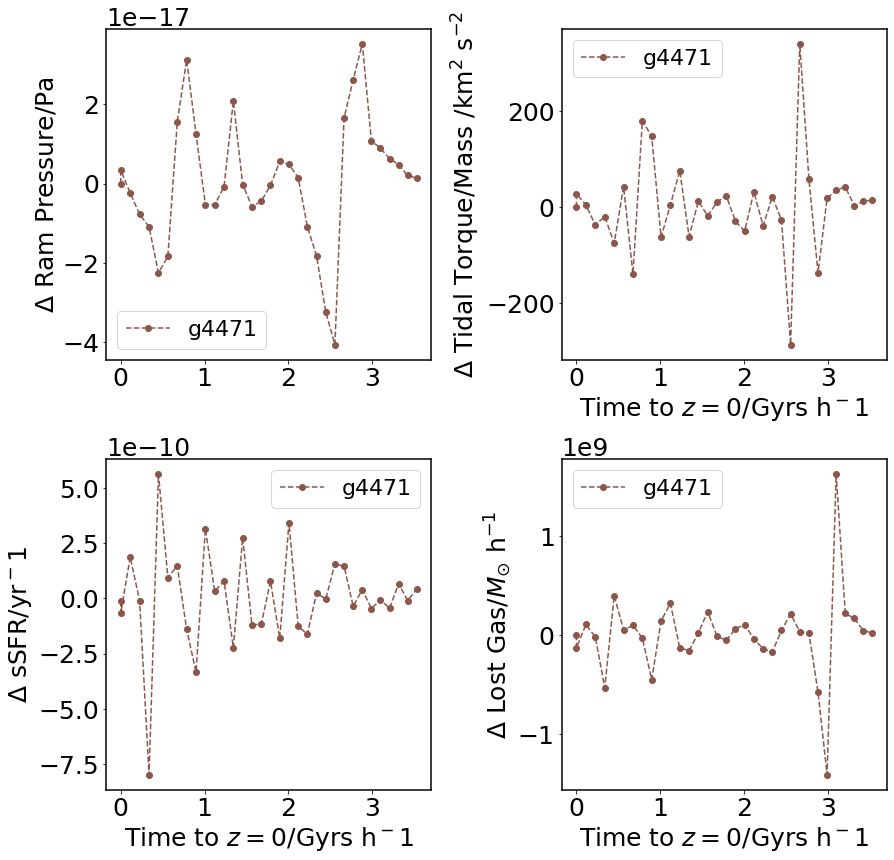

In [22]:
pl.figure(figsize=(14,14))

pl.subplots_adjust(wspace=0.4, hspace=0.3)

pl.subplot(2, 2, 1)
pl.plot(Time_4471[:-1], DeltaRP_4471, marker='o', ls='--', label='g4471', color='tab:brown')
pl.legend(loc='best')
pl.ylabel('$\Delta$ Ram Pressure/Pa')

pl.subplot(2, 2, 2)
pl.plot(Time_4471[:-1], DeltaTT_4471, marker='o', ls='--', label='g4471', color='tab:brown')
pl.legend(loc='best')
pl.ylabel('$\Delta$ Tidal Torque/Mass /km$^{2}$ s$^{-2}$')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')

pl.subplot(2, 2, 3)
pl.plot(Time_4471[:-1], DeltaSFR_4471, marker='o', ls='--', label='g4471', color='tab:brown')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('$\Delta$ sSFR/yr$^-1$')


pl.subplot(2, 2, 4)
pl.plot(Time_4471[:-1], DeltaMass_4471, marker='o', ls='--', label='g4471', color='tab:brown')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('$\Delta$ Lost Gas/$M_{\odot}$ h$^{-1}$')

Text(0, 0.5, '$\\Delta$ Lost Gas/$M_{\\odot}$ h$^{-1}$')

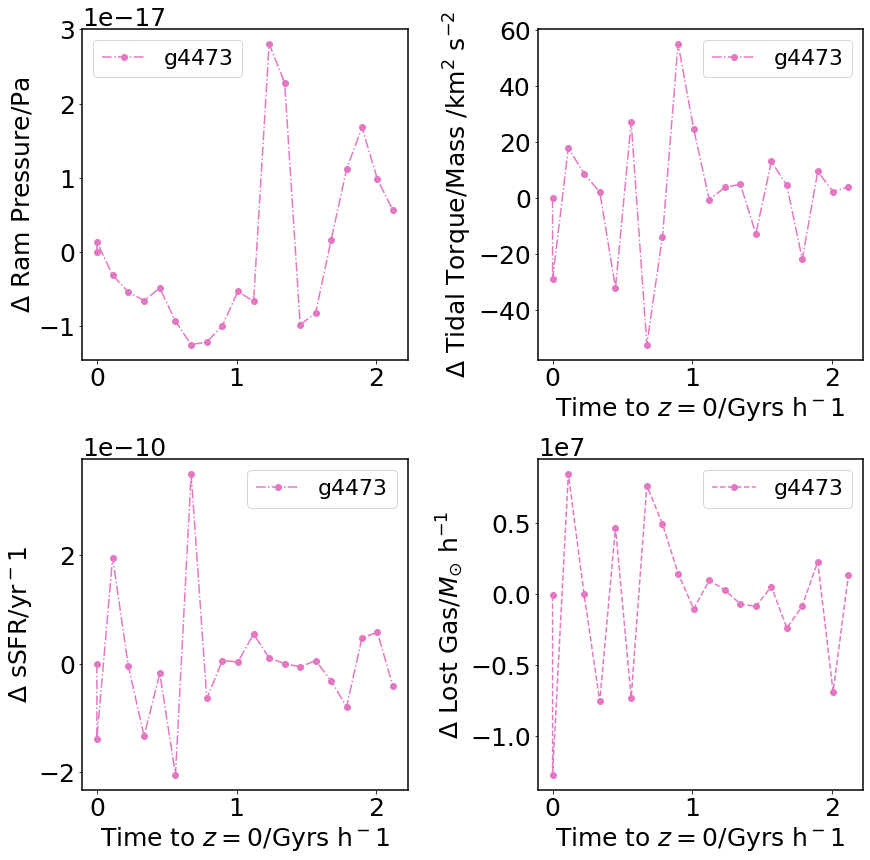

In [23]:
pl.figure(figsize=(14,14))

pl.subplots_adjust(wspace=0.4, hspace=0.3)

pl.subplot(2, 2, 1)
pl.plot(Time_4473[:-1], DeltaRP_4473, marker='o', ls='-.', label='g4473', color='tab:pink')
pl.legend(loc='best')
pl.ylabel('$\Delta$ Ram Pressure/Pa')

pl.subplot(2, 2, 2)
pl.plot(Time_4473[:-1], DeltaTT_4473, marker='o', ls='-.', label='g4473', color='tab:pink')
pl.legend(loc='best')
pl.ylabel('$\Delta$ Tidal Torque/Mass /km$^{2}$ s$^{-2}$')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')

pl.subplot(2, 2, 3)
pl.plot(Time_4473[:-1], DeltaSFR_4473, marker='o', ls='-.', label='g4473', color='tab:pink')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('$\Delta$ sSFR/yr$^-1$')


pl.subplot(2, 2, 4)
pl.plot(Time_4473[:-1], DeltaMass_4473, marker='o', ls='--', label='g4473', color='tab:pink')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('$\Delta$ Lost Gas/$M_{\odot}$ h$^{-1}$')

Text(0, 0.5, '$\\Delta$ Lost Gas/$M_{\\odot}$ h$^{-1}$')

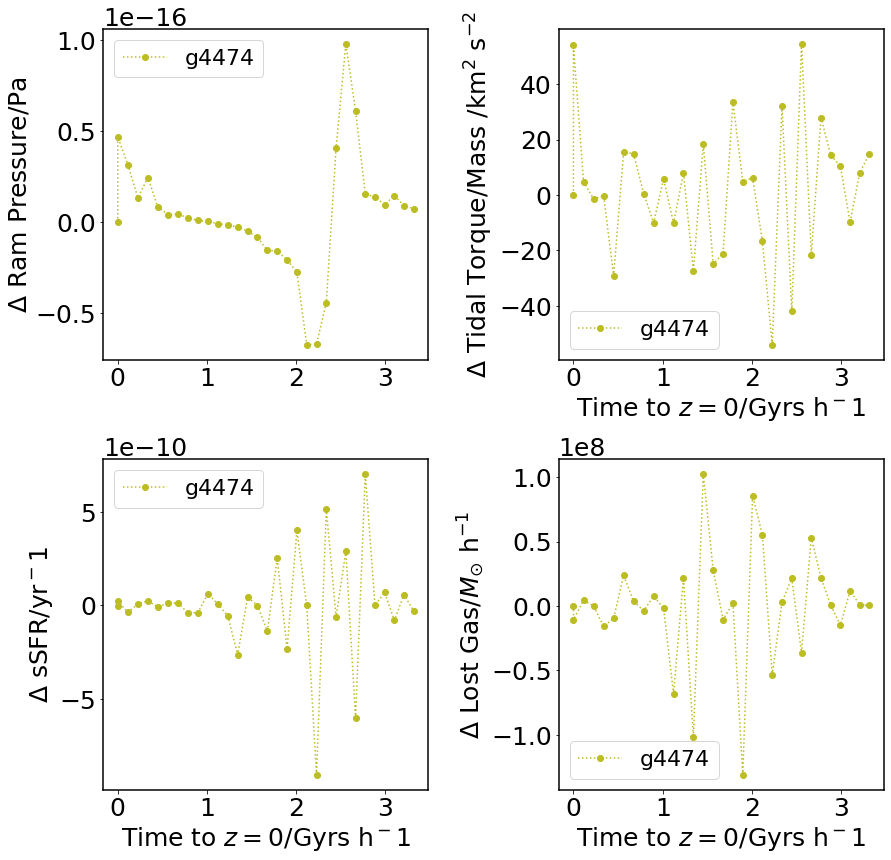

In [24]:
pl.figure(figsize=(14,14))

pl.subplots_adjust(wspace=0.4, hspace=0.3)

pl.subplot(2, 2, 1)
pl.plot(Time_4474[:-1], DeltaRP_4474, marker='o', ls=':', label='g4474', color='tab:olive')
pl.legend(loc='best')
pl.ylabel('$\Delta$ Ram Pressure/Pa')

pl.subplot(2, 2, 2)
pl.plot(Time_4474[:-1], DeltaTT_4474, marker='o', ls=':', label='g4474', color='tab:olive')
pl.legend(loc='best')
pl.ylabel('$\Delta$ Tidal Torque/Mass /km$^{2}$ s$^{-2}$')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')

pl.subplot(2, 2, 3)
pl.plot(Time_4474[:-1], DeltaSFR_4474, marker='o', ls=':', label='g4474', color='tab:olive')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('$\Delta$ sSFR/yr$^-1$')


pl.subplot(2, 2, 4)
pl.plot(Time_4474[:-1], DeltaMass_4474, marker='o', ls=':', label='g4474', color='tab:olive')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('$\Delta$ Lost Gas/$M_{\odot}$ h$^{-1}$')

Text(0.5, 0, 'Time to $z=0$/Gyrs h$^{-1}$')

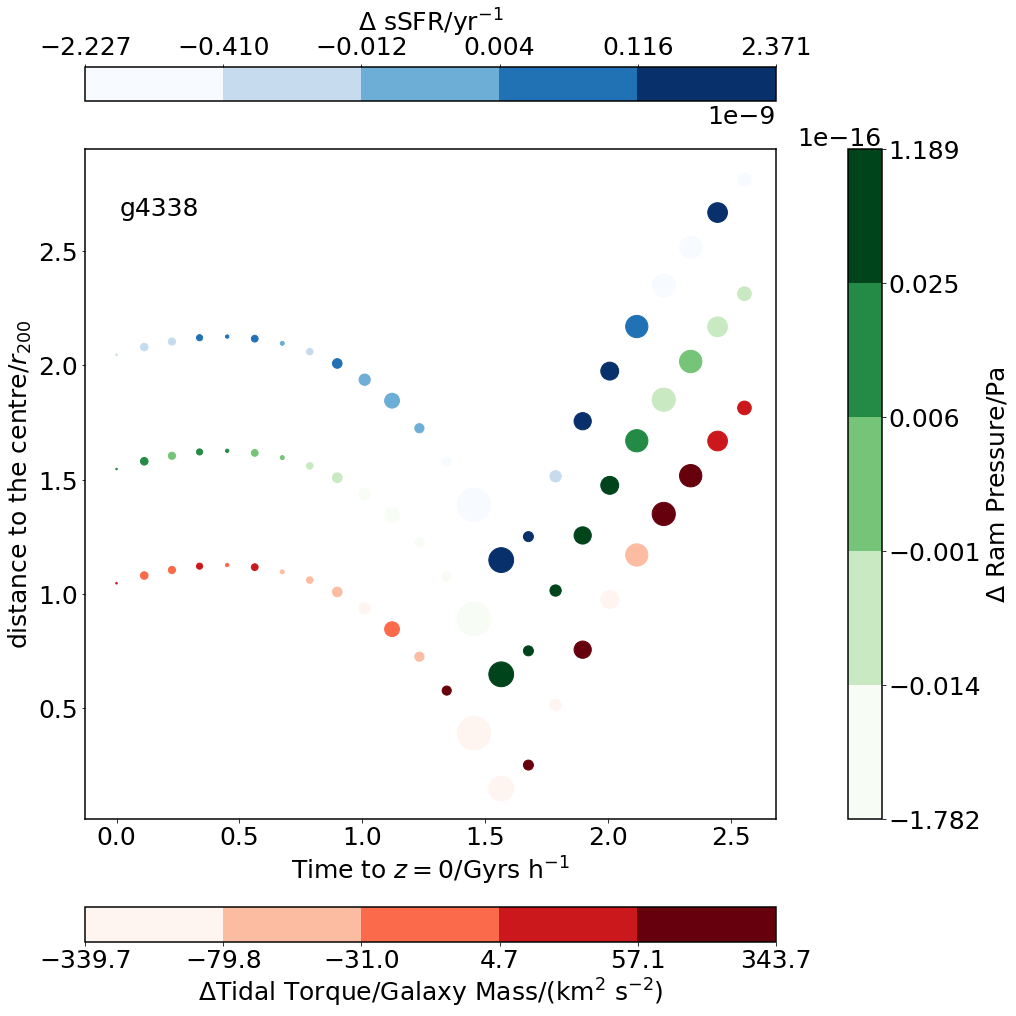

In [25]:
#ok, lets take a look ate the deltas by colour code.
pl.figure(figsize=(14,14), constrained_layout=True)

vaper = np.linspace(0, 100, 6)
papels = np.percentile(DeltaTT_4338, vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

pl.scatter(Time_4338[:-1], dist_4338[:-1], s=Gas_4338[:-1]/5e5, c=DeltaTT_4338, norm=norm, cmap=cm.Reds)
barT = pl.colorbar(label='$\Delta $Tidal Torque/Galaxy Mass/(km$^2$ s$^{-2})$',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(DeltaRP_4338, vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(Time_4338[:-1], dist_4338[:-1]+0.5, s=Gas_4338[:-1]/5e5, c=DeltaRP_4338, norm=norm2, cmap=cm.Greens)
barRP = pl.colorbar(label='$\Delta$ Ram Pressure/Pa', location='right')
barRP.set_ticks(papels2)

lsSFR = DeltaSFR_4338

papels3 = np.percentile(lsSFR, vaper)
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(Time_4338[:-1], dist_4338[:-1]+1., s=Gas_4338[:-1]/5e5, c=lsSFR, norm=norm3, cmap=cm.Blues)
bar3 = pl.colorbar(label='$\Delta$ sSFR/yr$^{-1}$', location='top')
bar3.set_ticks(papels3)

xlim = pl.xlim()
ylim = pl.ylim()

deltax = xlim[1]-xlim[0]
deltay = ylim[1]-ylim[0]

pl.text(xlim[0]+deltax/20., ylim[1]-deltay/10., 'g4338')

pl.ylabel('distance to the centre/$r_{200}$')
pl.xlabel('Time to $z=0$/Gyrs h$^{-1}$')

Text(0.5, 0, 'Time to $z=0$/Gyrs h$^{-1}$')

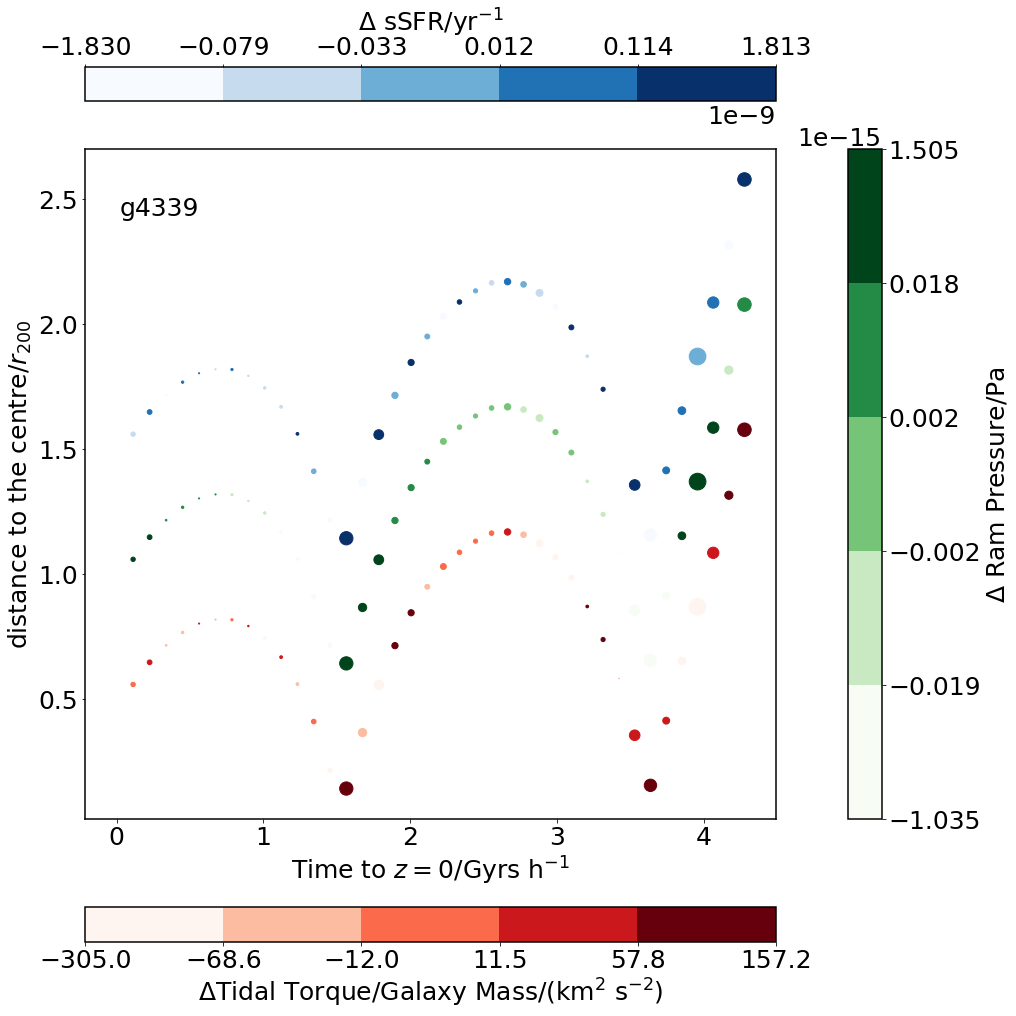

In [26]:
pl.figure(figsize=(14,14), constrained_layout=True)

vaper = np.linspace(0, 100, 6)
papels = np.percentile(DeltaTT_4339, vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

pl.scatter(Time_4339[:-1], dist_4339[:-1], s=Gas_4339[:-1]/5e5, c=DeltaTT_4339, norm=norm, cmap=cm.Reds)
barT = pl.colorbar(label='$\Delta $Tidal Torque/Galaxy Mass/(km$^2$ s$^{-2})$',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(DeltaRP_4339, vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(Time_4339[:-1], dist_4339[:-1]+0.5, s=Gas_4339[:-1]/5e5, c=DeltaRP_4339, norm=norm2, cmap=cm.Greens)
barRP = pl.colorbar(label='$\Delta$ Ram Pressure/Pa', location='right')
barRP.set_ticks(papels2)

lsSFR = DeltaSFR_4339

papels3 = np.percentile(lsSFR, vaper)
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(Time_4339[:-1], dist_4339[:-1]+1., s=Gas_4339[:-1]/5e5, c=lsSFR, norm=norm3, cmap=cm.Blues)
bar3 = pl.colorbar(label='$\Delta$ sSFR/yr$^{-1}$', location='top')
bar3.set_ticks(papels3)

xlim = pl.xlim()
ylim = pl.ylim()

deltax = xlim[1]-xlim[0]
deltay = ylim[1]-ylim[0]

pl.text(xlim[0]+deltax/20., ylim[1]-deltay/10., 'g4339')

pl.ylabel('distance to the centre/$r_{200}$')
pl.xlabel('Time to $z=0$/Gyrs h$^{-1}$')

Text(0.5, 0, 'Time to $z=0$/Gyrs h$^{-1}$')

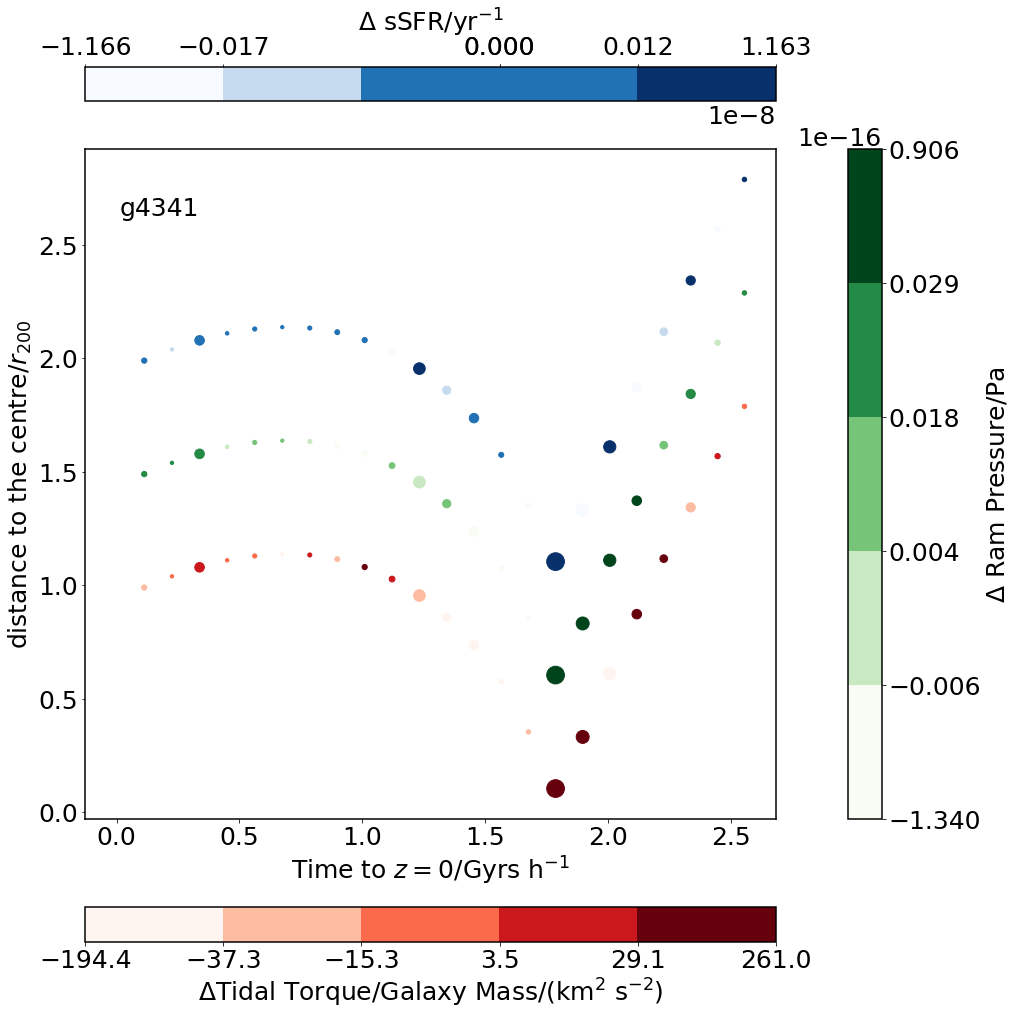

In [27]:
pl.figure(figsize=(14,14), constrained_layout=True)

vaper = np.linspace(0, 100, 6)
papels = np.percentile(DeltaTT_4341, vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

pl.scatter(Time_4341[:-1], dist_4341[:-1], s=Gas_4341[:-1]/5e5, c=DeltaTT_4341, norm=norm, cmap=cm.Reds)
barT = pl.colorbar(label='$\Delta $Tidal Torque/Galaxy Mass/(km$^2$ s$^{-2})$',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(DeltaRP_4341, vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(Time_4341[:-1], dist_4341[:-1]+0.5, s=Gas_4341[:-1]/5e5, c=DeltaRP_4341, norm=norm2, cmap=cm.Greens)
barRP = pl.colorbar(label='$\Delta$ Ram Pressure/Pa', location='right')
barRP.set_ticks(papels2)

lsSFR = DeltaSFR_4341

papels3 = np.percentile(lsSFR, vaper)
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(Time_4341[:-1], dist_4341[:-1]+1., s=Gas_4341[:-1]/5e5, c=lsSFR, norm=norm3, cmap=cm.Blues)
bar3 = pl.colorbar(label='$\Delta$ sSFR/yr$^{-1}$', location='top')
bar3.set_ticks(papels3)

xlim = pl.xlim()
ylim = pl.ylim()

deltax = xlim[1]-xlim[0]
deltay = ylim[1]-ylim[0]

pl.text(xlim[0]+deltax/20., ylim[1]-deltay/10., 'g4341')

pl.ylabel('distance to the centre/$r_{200}$')
pl.xlabel('Time to $z=0$/Gyrs h$^{-1}$')

Text(0.5, 0, 'Time to $z=0$/Gyrs h$^{-1}$')

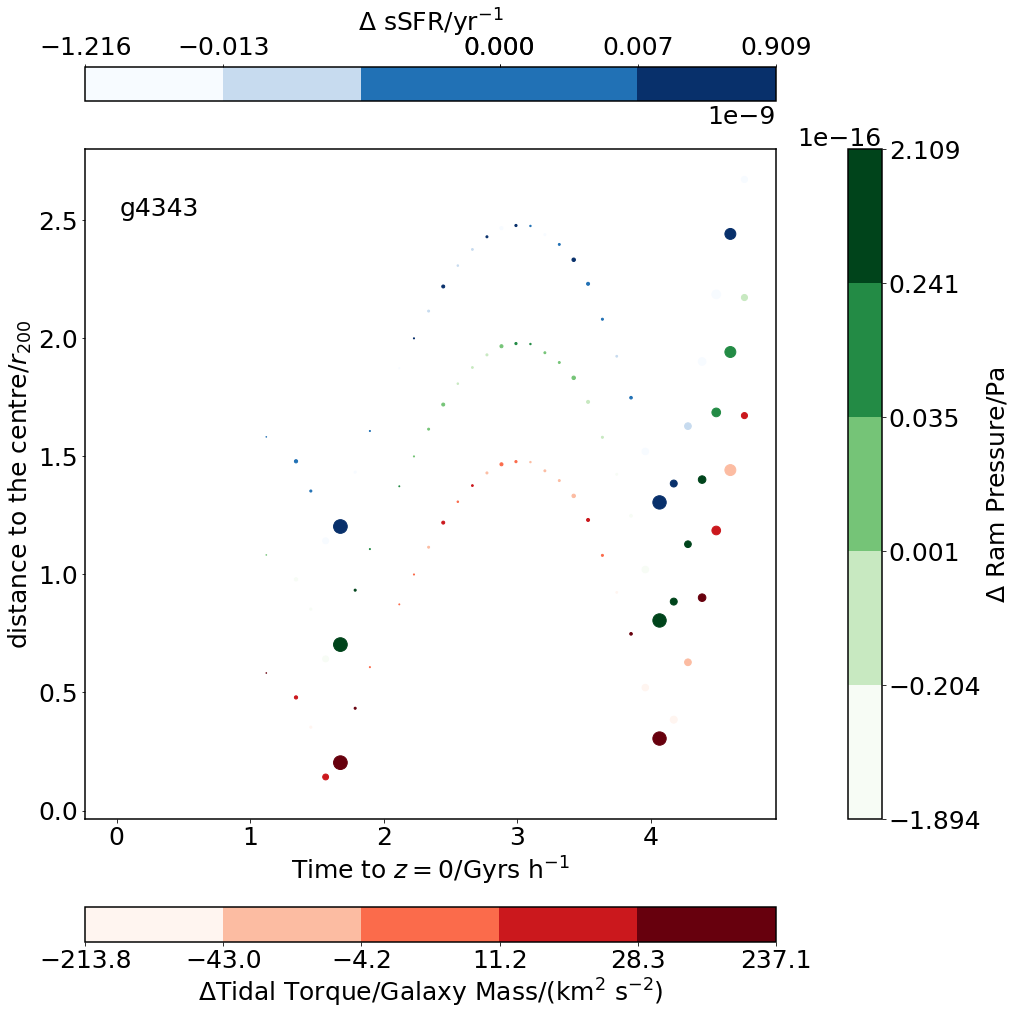

In [28]:
pl.figure(figsize=(14,14), constrained_layout=True)

vaper = np.linspace(0, 100, 6)
papels = np.percentile(DeltaTT_4343, vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

pl.scatter(Time_4343[:-1], dist_4343[:-1], s=Gas_4343[:-1]/5e5, c=DeltaTT_4343, norm=norm, cmap=cm.Reds)
barT = pl.colorbar(label='$\Delta $Tidal Torque/Galaxy Mass/(km$^2$ s$^{-2})$',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(DeltaRP_4343, vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(Time_4343[:-1], dist_4343[:-1]+0.5, s=Gas_4343[:-1]/5e5, c=DeltaRP_4343, norm=norm2, cmap=cm.Greens)
barRP = pl.colorbar(label='$\Delta$ Ram Pressure/Pa', location='right')
barRP.set_ticks(papels2)

lsSFR = DeltaSFR_4343

papels3 = np.percentile(lsSFR, vaper)
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(Time_4343[:-1], dist_4343[:-1]+1., s=Gas_4343[:-1]/5e5, c=lsSFR, norm=norm3, cmap=cm.Blues)
bar3 = pl.colorbar(label='$\Delta$ sSFR/yr$^{-1}$', location='top')
bar3.set_ticks(papels3)

xlim = pl.xlim()
ylim = pl.ylim()

deltax = xlim[1]-xlim[0]
deltay = ylim[1]-ylim[0]

pl.text(xlim[0]+deltax/20., ylim[1]-deltay/10., 'g4343')

pl.ylabel('distance to the centre/$r_{200}$')
pl.xlabel('Time to $z=0$/Gyrs h$^{-1}$')

Text(0.5, 0, 'Time to $z=0$/Gyrs h$^{-1}$')

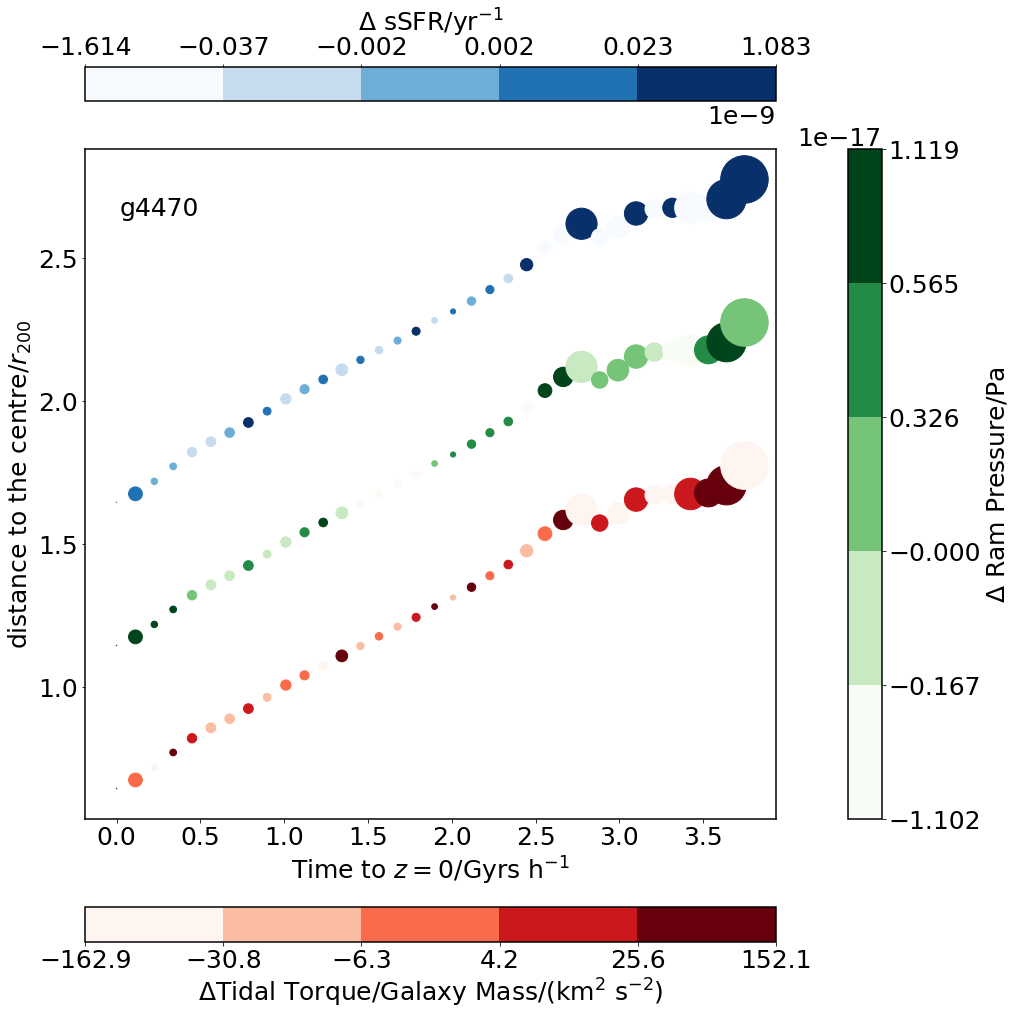

In [29]:
pl.figure(figsize=(14,14), constrained_layout=True)

vaper = np.linspace(0, 100, 6)
papels = np.percentile(DeltaTT_4470, vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

pl.scatter(Time_4470[:-1], dist_4470[:-1], s=Gas_4470[:-1]/5e5, c=DeltaTT_4470, norm=norm, cmap=cm.Reds)
barT = pl.colorbar(label='$\Delta $Tidal Torque/Galaxy Mass/(km$^2$ s$^{-2})$',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(DeltaRP_4470, vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(Time_4470[:-1], dist_4470[:-1]+0.5, s=Gas_4470[:-1]/5e5, c=DeltaRP_4470, norm=norm2, cmap=cm.Greens)
barRP = pl.colorbar(label='$\Delta$ Ram Pressure/Pa', location='right')
barRP.set_ticks(papels2)

lsSFR = DeltaSFR_4470

papels3 = np.percentile(lsSFR, vaper)
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(Time_4470[:-1], dist_4470[:-1]+1., s=Gas_4470[:-1]/5e5, c=lsSFR, norm=norm3, cmap=cm.Blues)
bar3 = pl.colorbar(label='$\Delta$ sSFR/yr$^{-1}$', location='top')
bar3.set_ticks(papels3)

xlim = pl.xlim()
ylim = pl.ylim()

deltax = xlim[1]-xlim[0]
deltay = ylim[1]-ylim[0]

pl.text(xlim[0]+deltax/20., ylim[1]-deltay/10., 'g4470')

pl.ylabel('distance to the centre/$r_{200}$')
pl.xlabel('Time to $z=0$/Gyrs h$^{-1}$')

Text(0.5, 0, 'Time to $z=0$/Gyrs h$^{-1}$')

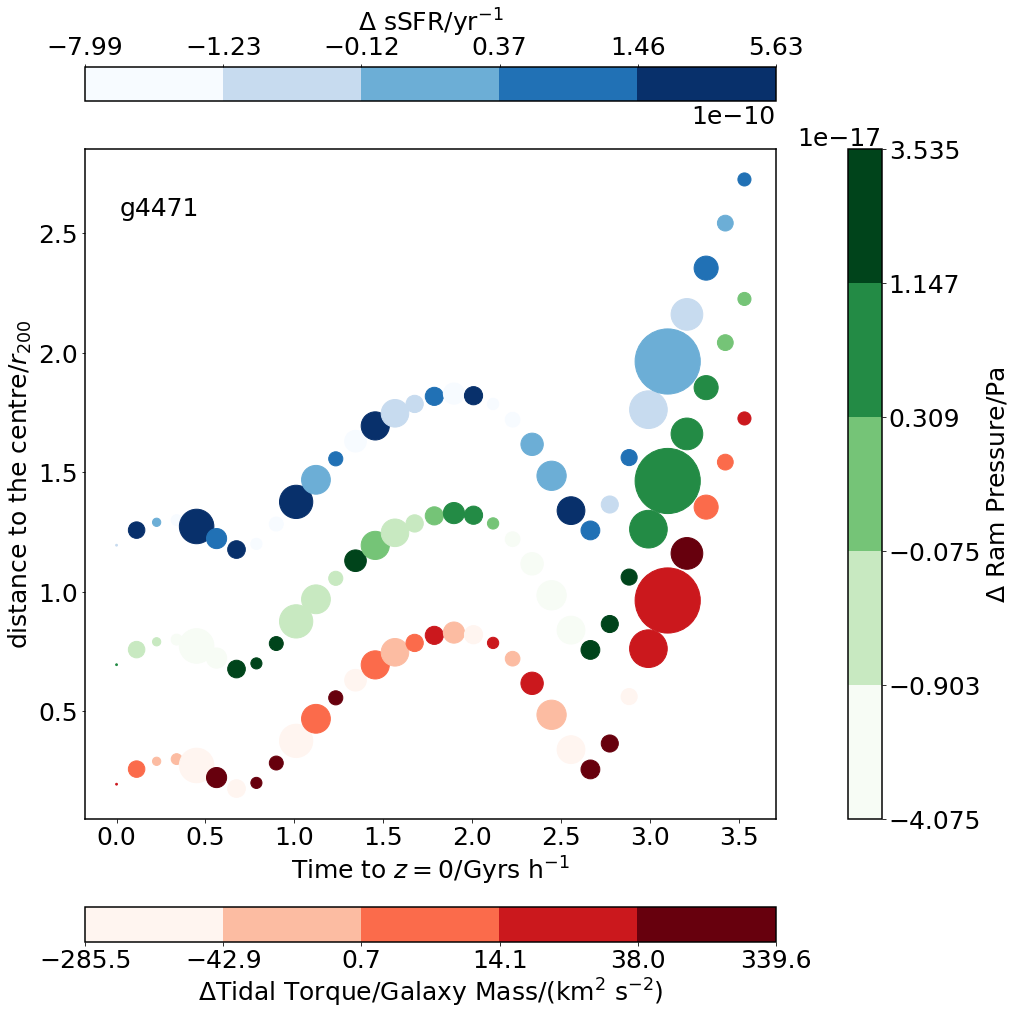

In [30]:
pl.figure(figsize=(14,14), constrained_layout=True)

vaper = np.linspace(0, 100, 6)
papels = np.percentile(DeltaTT_4471, vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

pl.scatter(Time_4471[:-1], dist_4471[:-1], s=Gas_4471[:-1]/5e5, c=DeltaTT_4471, norm=norm, cmap=cm.Reds)
barT = pl.colorbar(label='$\Delta $Tidal Torque/Galaxy Mass/(km$^2$ s$^{-2})$',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(DeltaRP_4471, vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(Time_4471[:-1], dist_4471[:-1]+0.5, s=Gas_4471[:-1]/5e5, c=DeltaRP_4471, norm=norm2, cmap=cm.Greens)
barRP = pl.colorbar(label='$\Delta$ Ram Pressure/Pa', location='right')
barRP.set_ticks(papels2)

lsSFR = DeltaSFR_4471

papels3 = np.percentile(lsSFR, vaper)
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(Time_4471[:-1], dist_4471[:-1]+1., s=Gas_4471[:-1]/5e5, c=lsSFR, norm=norm3, cmap=cm.Blues)
bar3 = pl.colorbar(label='$\Delta$ sSFR/yr$^{-1}$', location='top')
bar3.set_ticks(papels3)

xlim = pl.xlim()
ylim = pl.ylim()

deltax = xlim[1]-xlim[0]
deltay = ylim[1]-ylim[0]

pl.text(xlim[0]+deltax/20., ylim[1]-deltay/10., 'g4471')

pl.ylabel('distance to the centre/$r_{200}$')
pl.xlabel('Time to $z=0$/Gyrs h$^{-1}$')

Text(0.5, 0, 'Time to $z=0$/Gyrs h$^{-1}$')

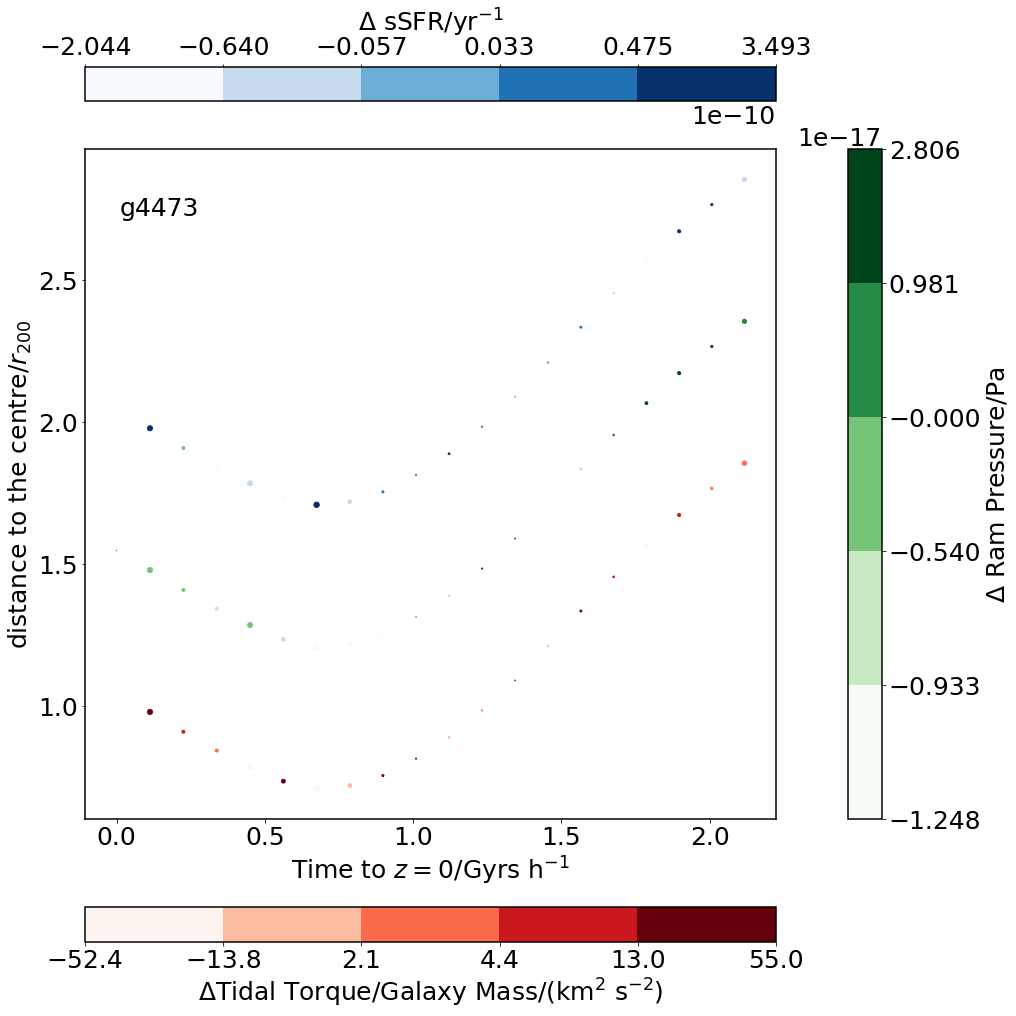

In [31]:
pl.figure(figsize=(14,14), constrained_layout=True)

vaper = np.linspace(0, 100, 6)
papels = np.percentile(DeltaTT_4473, vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

pl.scatter(Time_4473[:-1], dist_4473[:-1], s=Gas_4473[:-1]/5e5, c=DeltaTT_4473, norm=norm, cmap=cm.Reds)
barT = pl.colorbar(label='$\Delta $Tidal Torque/Galaxy Mass/(km$^2$ s$^{-2})$',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(DeltaRP_4473, vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(Time_4473[:-1], dist_4473[:-1]+0.5, s=Gas_4473[:-1]/5e5, c=DeltaRP_4473, norm=norm2, cmap=cm.Greens)
barRP = pl.colorbar(label='$\Delta$ Ram Pressure/Pa', location='right')
barRP.set_ticks(papels2)

lsSFR = DeltaSFR_4473

papels3 = np.percentile(lsSFR, vaper)
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(Time_4473[:-1], dist_4473[:-1]+1., s=Gas_4473[:-1]/5e5, c=lsSFR, norm=norm3, cmap=cm.Blues)
bar3 = pl.colorbar(label='$\Delta$ sSFR/yr$^{-1}$', location='top')
bar3.set_ticks(papels3)

xlim = pl.xlim()
ylim = pl.ylim()

deltax = xlim[1]-xlim[0]
deltay = ylim[1]-ylim[0]

pl.text(xlim[0]+deltax/20., ylim[1]-deltay/10., 'g4473')

pl.ylabel('distance to the centre/$r_{200}$')
pl.xlabel('Time to $z=0$/Gyrs h$^{-1}$')

Text(0.5, 0, 'Time to $z=0$/Gyrs h$^{-1}$')

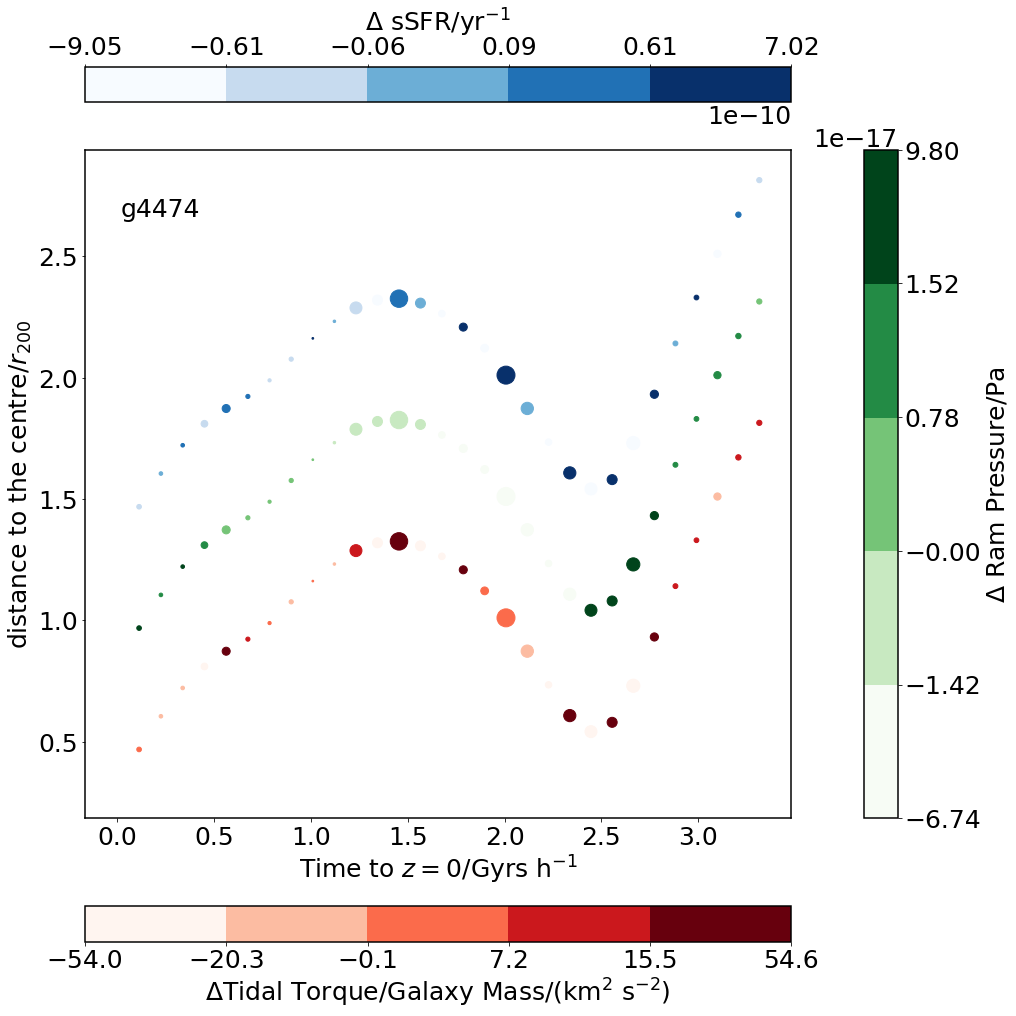

In [32]:
pl.figure(figsize=(14,14), constrained_layout=True)

vaper = np.linspace(0, 100, 6)
papels = np.percentile(DeltaTT_4474, vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

pl.scatter(Time_4474[:-1], dist_4474[:-1], s=Gas_4474[:-1]/5e5, c=DeltaTT_4474, norm=norm, cmap=cm.Reds)
barT = pl.colorbar(label='$\Delta $Tidal Torque/Galaxy Mass/(km$^2$ s$^{-2})$',location='bottom')
barT.set_ticks(papels)

papels2 = np.percentile(DeltaRP_4474, vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(Time_4474[:-1], dist_4474[:-1]+0.5, s=Gas_4474[:-1]/5e5, c=DeltaRP_4474, norm=norm2, cmap=cm.Greens)
barRP = pl.colorbar(label='$\Delta$ Ram Pressure/Pa', location='right')
barRP.set_ticks(papels2)

lsSFR = DeltaSFR_4474

papels3 = np.percentile(lsSFR, vaper)
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(Time_4474[:-1], dist_4474[:-1]+1., s=Gas_4474[:-1]/5e5, c=lsSFR, norm=norm3, cmap=cm.Blues)
bar3 = pl.colorbar(label='$\Delta$ sSFR/yr$^{-1}$', location='top')
bar3.set_ticks(papels3)

xlim = pl.xlim()
ylim = pl.ylim()

deltax = xlim[1]-xlim[0]
deltay = ylim[1]-ylim[0]

pl.text(xlim[0]+deltax/20., ylim[1]-deltay/10., 'g4474')

pl.ylabel('distance to the centre/$r_{200}$')
pl.xlabel('Time to $z=0$/Gyrs h$^{-1}$')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10


Text(0, 0.5, 'log(Lost Gas/$M_{\\odot}$ h$^{-1}$)')

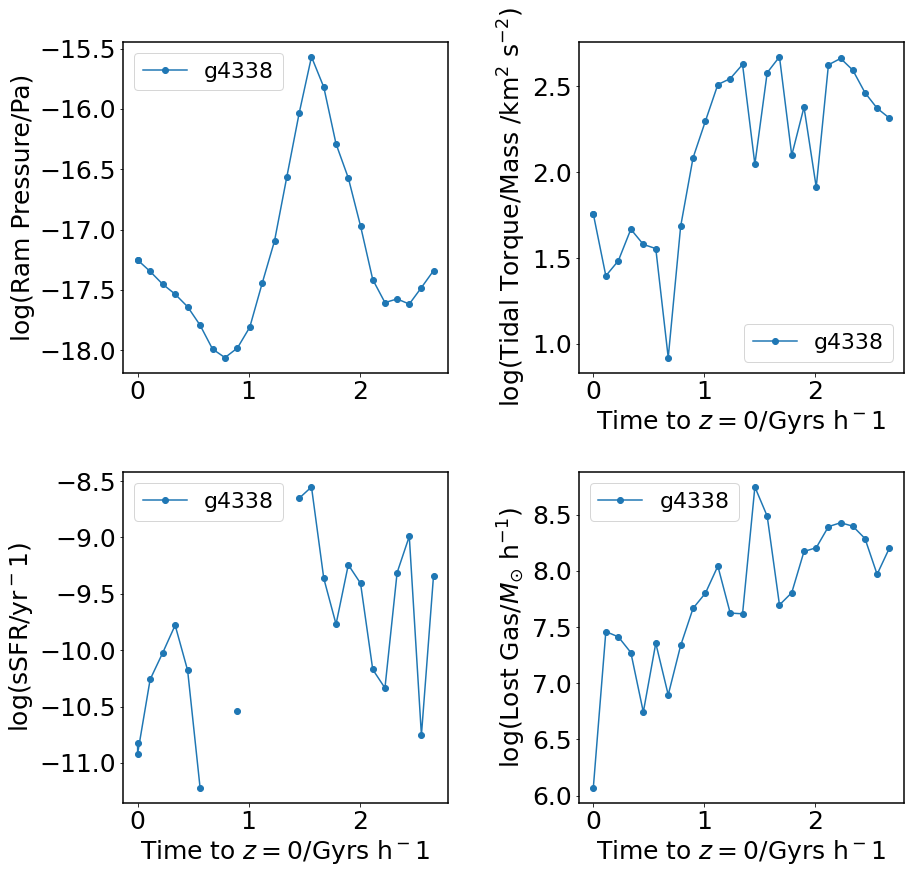

In [33]:
# Not deltas
pl.figure(figsize=(14,14))

pl.subplots_adjust(wspace=0.4, hspace=0.3)

pl.subplot(2, 2, 1)
pl.plot(Time_4338, np.log10(RP_4338), marker='o', ls='-', label='g4338', color='tab:blue')
pl.legend(loc='best')
pl.ylabel('log(Ram Pressure/Pa)')

pl.subplot(2, 2, 2)
pl.plot(Time_4338, np.log10(TSt_4338/gMass_4338), marker='o', ls='-', label='g4338', color='tab:blue')
pl.legend(loc='best')
pl.ylabel('log(Tidal Torque/Mass /km$^{2}$ s$^{-2}$)')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')

pl.subplot(2, 2, 3)
pl.plot(Time_4338, np.log10(SFR_4338/starMass_4338), marker='o', ls='-', label='g4338', color='tab:blue')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('log(sSFR/yr$^-1)$')


pl.subplot(2, 2, 4)
pl.plot(Time_4338, np.log10(Gas_4338), marker='o', ls='-', label='g4338', color='tab:blue')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('log(Lost Gas/$M_{\odot}$ h$^{-1}$)')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10


Text(0, 0.5, 'log(Lost Gas/$M_{\\odot}$ h$^{-1}$)')

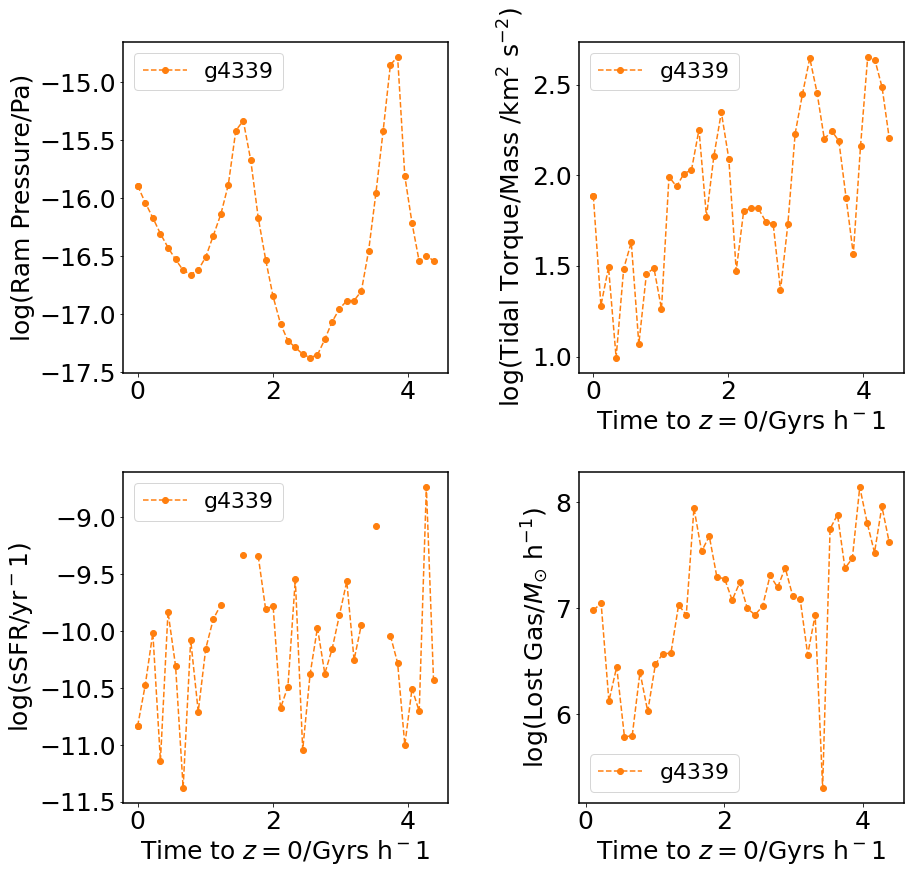

In [34]:
# Not deltas
pl.figure(figsize=(14,14))

pl.subplots_adjust(wspace=0.4, hspace=0.3)

pl.subplot(2, 2, 1)
pl.plot(Time_4339, np.log10(RP_4339), marker='o', ls='--', label='g4339', color='tab:orange')
pl.legend(loc='best')
pl.ylabel('log(Ram Pressure/Pa)')

pl.subplot(2, 2, 2)
pl.plot(Time_4339, np.log10(TSt_4339/gMass_4339), marker='o', ls='--', label='g4339', color='tab:orange')
pl.legend(loc='best')
pl.ylabel('log(Tidal Torque/Mass /km$^{2}$ s$^{-2}$)')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')

pl.subplot(2, 2, 3)
pl.plot(Time_4339, np.log10(SFR_4339/starMass_4339), marker='o', ls='--', label='g4339', color='tab:orange')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('log(sSFR/yr$^-1)$')


pl.subplot(2, 2, 4)
pl.plot(Time_4339, np.log10(Gas_4339), marker='o', ls='--', label='g4339', color='tab:orange')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('log(Lost Gas/$M_{\odot}$ h$^{-1}$)')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


Text(0, 0.5, 'log(Lost Gas/$M_{\\odot}$ h$^{-1}$)')

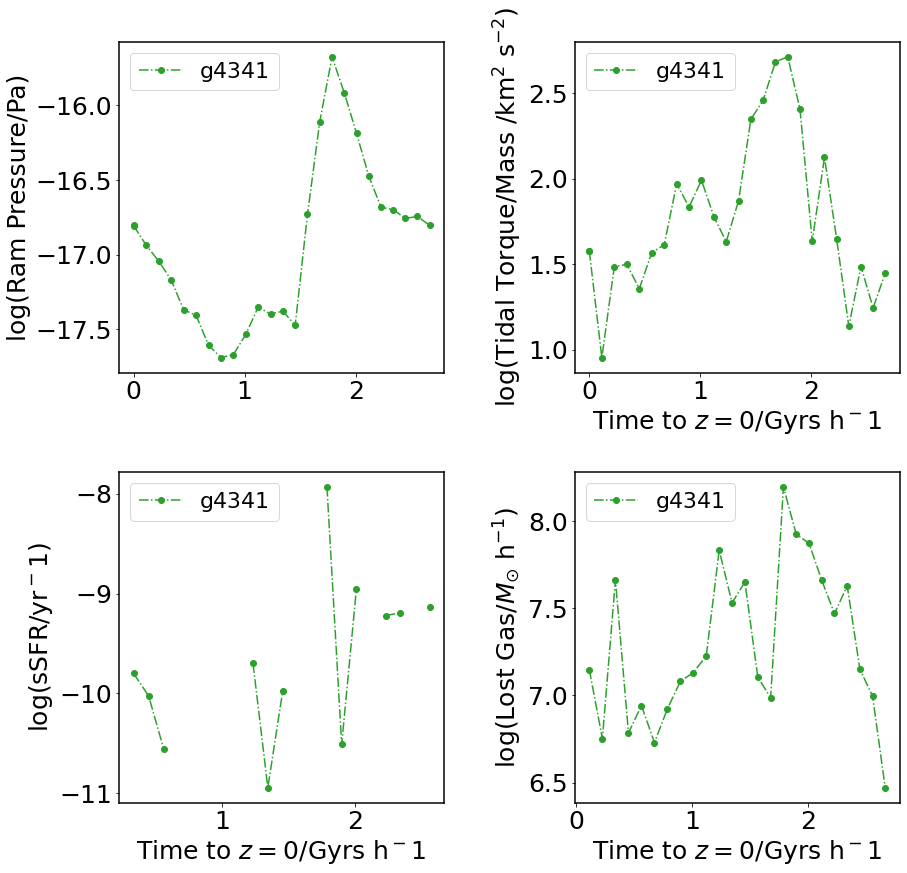

In [35]:
pl.figure(figsize=(14,14))

pl.subplots_adjust(wspace=0.4, hspace=0.3)

pl.subplot(2, 2, 1)
pl.plot(Time_4341, np.log10(RP_4341), marker='o', ls='-.', label='g4341', color='tab:green')
pl.legend(loc='best')
pl.ylabel('log(Ram Pressure/Pa)')

pl.subplot(2, 2, 2)
pl.plot(Time_4341, np.log10(TSt_4341/gMass_4341), marker='o', ls='-.', label='g4341', color='tab:green')
pl.legend(loc='best')
pl.ylabel('log(Tidal Torque/Mass /km$^{2}$ s$^{-2}$)')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')

pl.subplot(2, 2, 3)
pl.plot(Time_4341, np.log10(SFR_4341/starMass_4341), marker='o', ls='-.', label='g4341', color='tab:green')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('log(sSFR/yr$^-1)$')


pl.subplot(2, 2, 4)
pl.plot(Time_4341, np.log10(Gas_4341), marker='o', ls='-.', label='g4341', color='tab:green')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('log(Lost Gas/$M_{\odot}$ h$^{-1}$)')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


Text(0, 0.5, 'log(Lost Gas/$M_{\\odot}$ h$^{-1}$)')

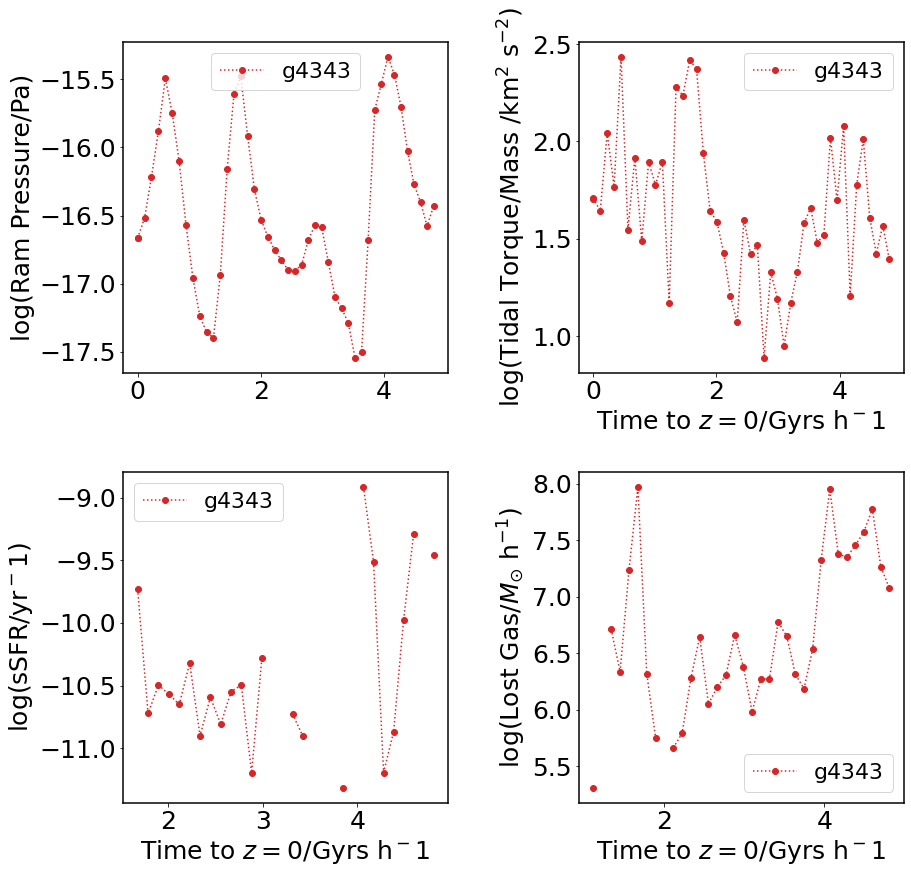

In [36]:
pl.figure(figsize=(14,14))

pl.subplots_adjust(wspace=0.4, hspace=0.3)

pl.subplot(2, 2, 1)
pl.plot(Time_4343, np.log10(RP_4343), marker='o', ls=':', label='g4343', color='tab:red')
pl.legend(loc='best')
pl.ylabel('log(Ram Pressure/Pa)')

pl.subplot(2, 2, 2)
pl.plot(Time_4343, np.log10(TSt_4343/gMass_4343), marker='o', ls=':', label='g4343', color='tab:red')
pl.legend(loc='best')
pl.ylabel('log(Tidal Torque/Mass /km$^{2}$ s$^{-2}$)')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')

pl.subplot(2, 2, 3)
pl.plot(Time_4343, np.log10(SFR_4343/starMass_4343), marker='o', ls=':', label='g4343', color='tab:red')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('log(sSFR/yr$^-1)$')


pl.subplot(2, 2, 4)
pl.plot(Time_4343, np.log10(Gas_4343), marker='o', ls=':', label='g4343', color='tab:red')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('log(Lost Gas/$M_{\odot}$ h$^{-1}$)')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


Text(0, 0.5, 'log(Lost Gas/$M_{\\odot}$ h$^{-1}$)')

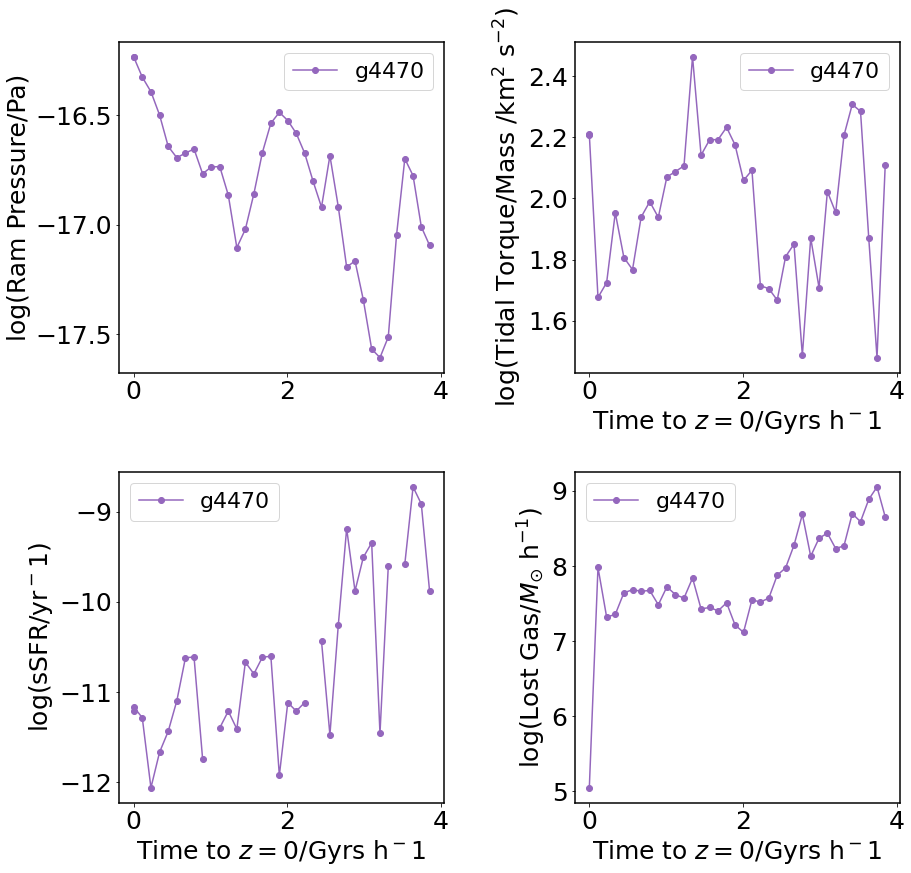

In [37]:
pl.figure(figsize=(14,14))

pl.subplots_adjust(wspace=0.4, hspace=0.3)

pl.subplot(2, 2, 1)
pl.plot(Time_4470, np.log10(RP_4470), marker='o', ls='-', label='g4470', color='tab:purple')
pl.legend(loc='best')
pl.ylabel('log(Ram Pressure/Pa)')

pl.subplot(2, 2, 2)
pl.plot(Time_4470, np.log10(TSt_4470/gMass_4470), marker='o', ls='-', label='g4470', color='tab:purple')
pl.legend(loc='best')
pl.ylabel('log(Tidal Torque/Mass /km$^{2}$ s$^{-2}$)')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')

pl.subplot(2, 2, 3)
pl.plot(Time_4470, np.log10(SFR_4470/starMass_4470), marker='o', ls='-', label='g4470', color='tab:purple')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('log(sSFR/yr$^-1)$')


pl.subplot(2, 2, 4)
pl.plot(Time_4470, np.log10(Gas_4470), marker='o', ls='-', label='g4470', color='tab:purple')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('log(Lost Gas/$M_{\odot}$ h$^{-1}$)')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


Text(0, 0.5, 'log(Lost Gas/$M_{\\odot}$ h$^{-1}$)')

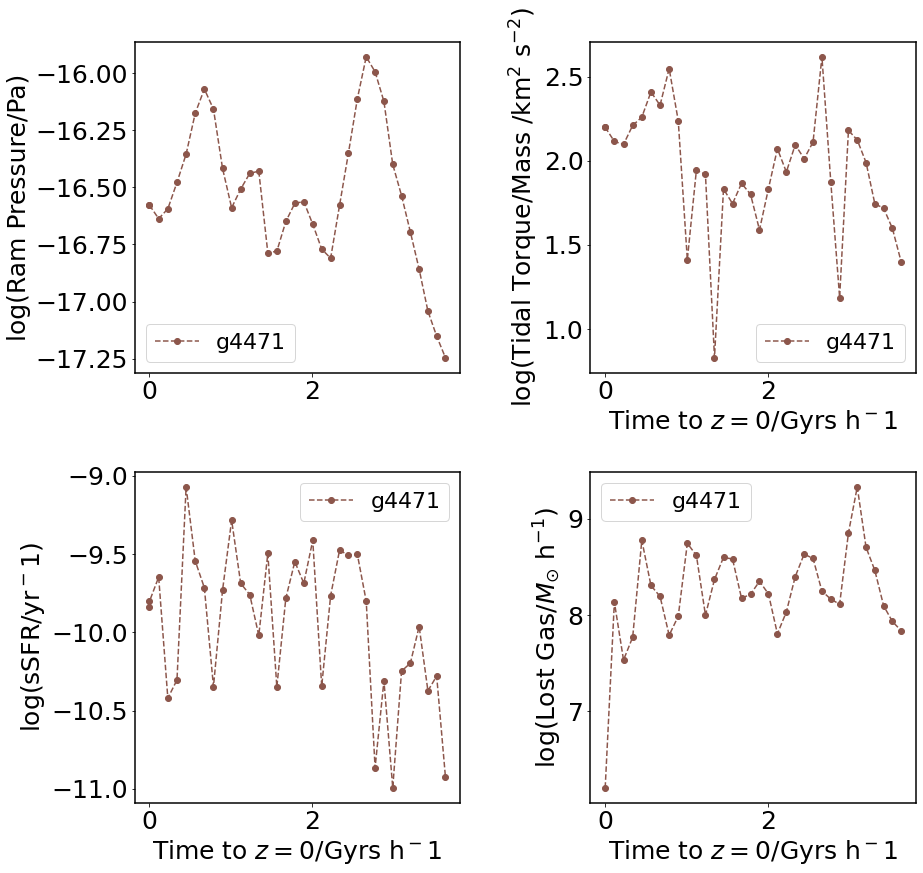

In [38]:
pl.figure(figsize=(14,14))

pl.subplots_adjust(wspace=0.4, hspace=0.3)

pl.subplot(2, 2, 1)
pl.plot(Time_4471, np.log10(RP_4471), marker='o', ls='--', label='g4471', color='tab:brown')
pl.legend(loc='best')
pl.ylabel('log(Ram Pressure/Pa)')

pl.subplot(2, 2, 2)
pl.plot(Time_4471, np.log10(TSt_4471/gMass_4471), marker='o', ls='--', label='g4471', color='tab:brown')
pl.legend(loc='best')
pl.ylabel('log(Tidal Torque/Mass /km$^{2}$ s$^{-2}$)')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')

pl.subplot(2, 2, 3)
pl.plot(Time_4471, np.log10(SFR_4471/starMass_4471), marker='o', ls='--', label='g4471', color='tab:brown')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('log(sSFR/yr$^-1)$')


pl.subplot(2, 2, 4)
pl.plot(Time_4471, np.log10(Gas_4471), marker='o', ls='--', label='g4471', color='tab:brown')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('log(Lost Gas/$M_{\odot}$ h$^{-1}$)')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


Text(0, 0.5, 'log(Lost Gas/$M_{\\odot}$ h$^{-1}$)')

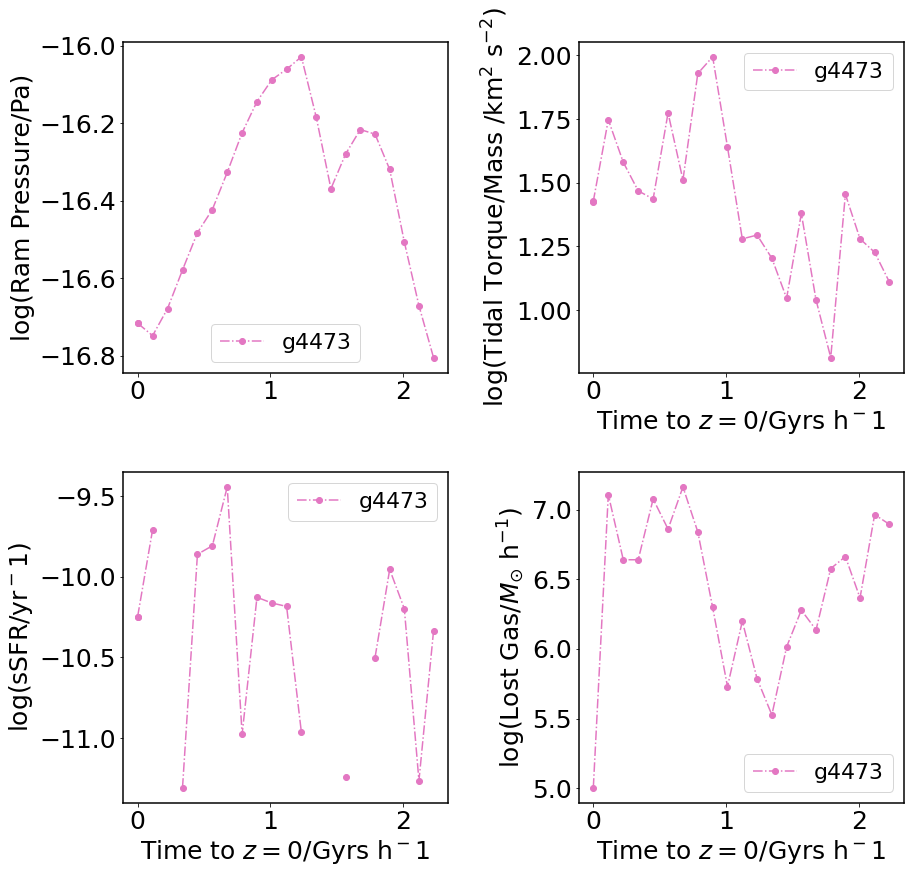

In [39]:
pl.figure(figsize=(14,14))

pl.subplots_adjust(wspace=0.4, hspace=0.3)

pl.subplot(2, 2, 1)
pl.plot(Time_4473, np.log10(RP_4473), marker='o', ls='-.', label='g4473', color='tab:pink')
pl.legend(loc='best')
pl.ylabel('log(Ram Pressure/Pa)')

pl.subplot(2, 2, 2)
pl.plot(Time_4473, np.log10(TSt_4473/gMass_4473), marker='o', ls='-.', label='g4473', color='tab:pink')
pl.legend(loc='best')
pl.ylabel('log(Tidal Torque/Mass /km$^{2}$ s$^{-2}$)')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')

pl.subplot(2, 2, 3)
pl.plot(Time_4473, np.log10(SFR_4473/starMass_4473), marker='o', ls='-.', label='g4473', color='tab:pink')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('log(sSFR/yr$^-1)$')


pl.subplot(2, 2, 4)
pl.plot(Time_4473, np.log10(Gas_4473), marker='o', ls='-.', label='g4473', color='tab:pink')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('log(Lost Gas/$M_{\odot}$ h$^{-1}$)')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


Text(0, 0.5, 'log(Lost Gas/$M_{\\odot}$ h$^{-1}$)')

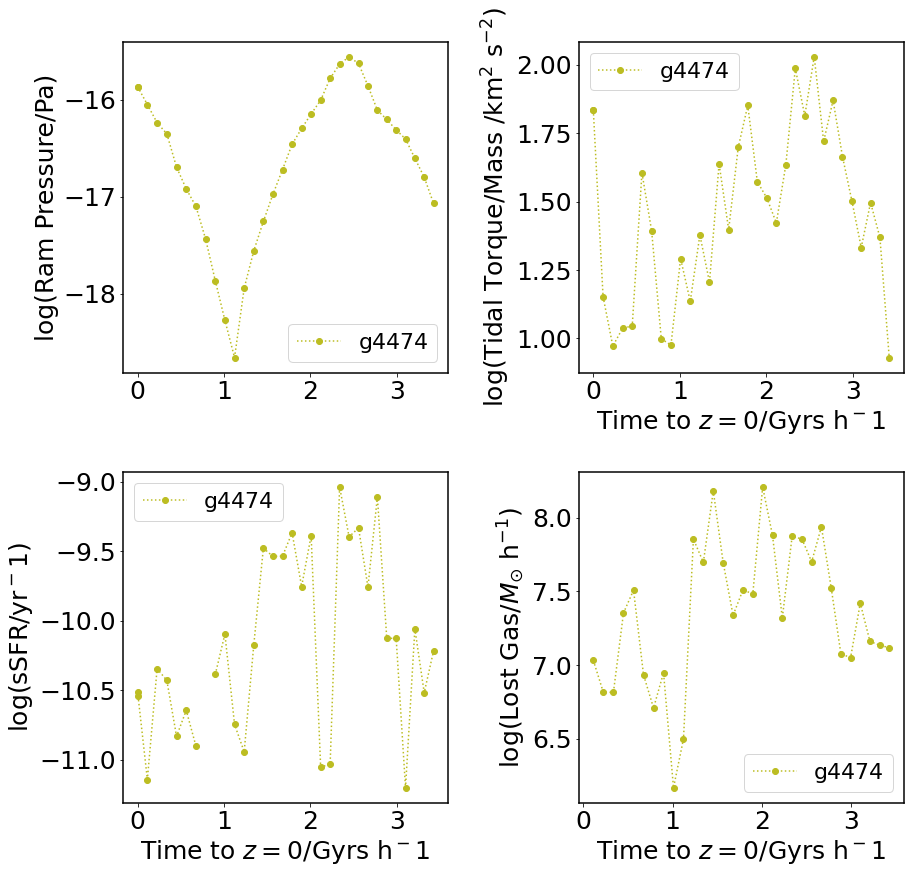

In [40]:
pl.figure(figsize=(14,14))

pl.subplots_adjust(wspace=0.4, hspace=0.3)

pl.subplot(2, 2, 1)
pl.plot(Time_4474, np.log10(RP_4474), marker='o', ls=':', label='g4474', color='tab:olive')
pl.legend(loc='best')
pl.ylabel('log(Ram Pressure/Pa)')

pl.subplot(2, 2, 2)
pl.plot(Time_4474, np.log10(TSt_4474/gMass_4474), marker='o', ls=':', label='g4474', color='tab:olive')
pl.legend(loc='best')
pl.ylabel('log(Tidal Torque/Mass /km$^{2}$ s$^{-2}$)')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')

pl.subplot(2, 2, 3)
pl.plot(Time_4474, np.log10(SFR_4474/starMass_4474), marker='o', ls=':', label='g4474', color='tab:olive')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('log(sSFR/yr$^-1)$')


pl.subplot(2, 2, 4)
pl.plot(Time_4474, np.log10(Gas_4474), marker='o', ls=':', label='g4474', color='tab:olive')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('log(Lost Gas/$M_{\odot}$ h$^{-1}$)')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10
/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10
/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10
/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log10
/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log10
/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWa

Text(0, 0.5, 'log(Lost Gas/$M_{\\odot}$ h$^{-1}$)')

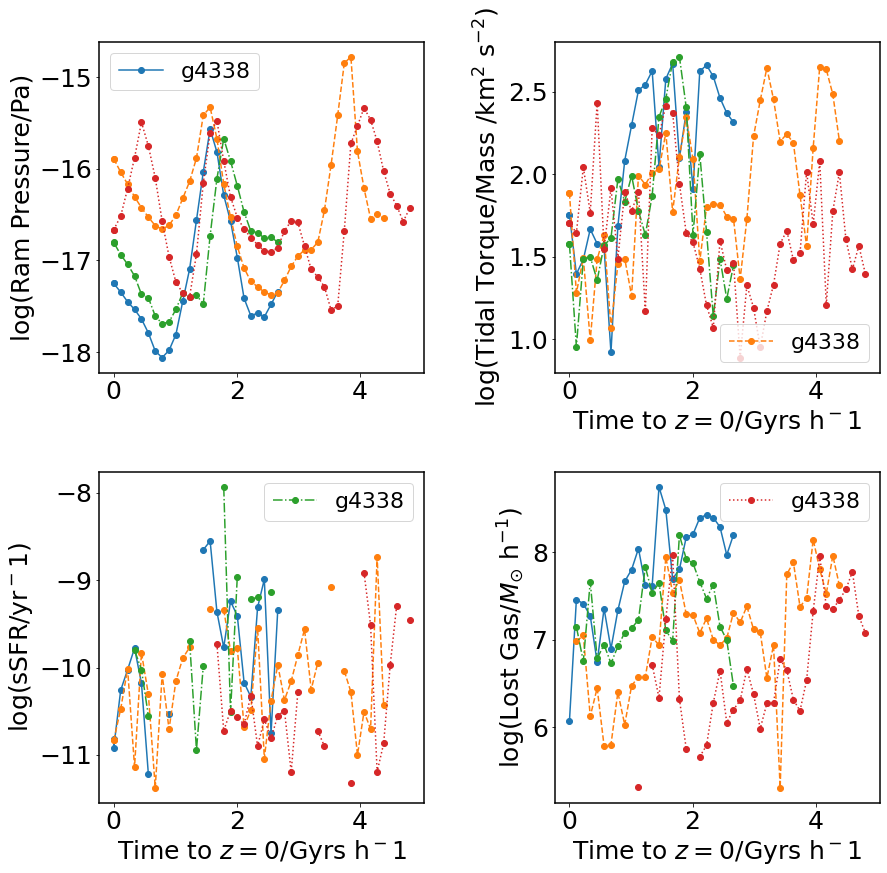

In [41]:
# all together
pl.figure(figsize=(14,14))

pl.subplots_adjust(wspace=0.4, hspace=0.3)

pl.subplot(2, 2, 1)
pl.plot(Time_4338, np.log10(RP_4338), marker='o', ls='-', label='g4338', color='tab:blue')
pl.plot(Time_4339, np.log10(RP_4339), marker='o', ls='--', color='tab:orange')
pl.plot(Time_4341, np.log10(RP_4341), marker='o', ls='-.', color='tab:green')
pl.plot(Time_4343, np.log10(RP_4343), marker='o', ls=':', color='tab:red')

pl.legend(loc='best')
pl.ylabel('log(Ram Pressure/Pa)')

pl.subplot(2, 2, 2)
pl.plot(Time_4338, np.log10(TSt_4338/gMass_4338), marker='o', ls='-',  color='tab:blue')
pl.plot(Time_4339, np.log10(TSt_4339/gMass_4339), marker='o', ls='--', label='g4338', color='tab:orange')
pl.plot(Time_4341, np.log10(TSt_4341/gMass_4341), marker='o', ls='-.', color='tab:green')
pl.plot(Time_4343, np.log10(TSt_4343/gMass_4343), marker='o', ls=':', color='tab:red')

pl.legend(loc='best')
pl.ylabel('log(Tidal Torque/Mass /km$^{2}$ s$^{-2}$)')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')

pl.subplot(2, 2, 3)
pl.plot(Time_4338, np.log10(SFR_4338/starMass_4338), marker='o', ls='-', color='tab:blue')
pl.plot(Time_4339, np.log10(SFR_4339/starMass_4339), marker='o', ls='--', color='tab:orange')
pl.plot(Time_4341, np.log10(SFR_4341/starMass_4341), marker='o', ls='-.', label='g4338', color='tab:green')
pl.plot(Time_4343, np.log10(SFR_4343/starMass_4343), marker='o', ls=':', color='tab:red')

pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('log(sSFR/yr$^-1)$')


pl.subplot(2, 2, 4)
pl.plot(Time_4338, np.log10(Gas_4338), marker='o', ls='-', color='tab:blue')
pl.plot(Time_4339, np.log10(Gas_4339), marker='o', ls='--', color='tab:orange')
pl.plot(Time_4341, np.log10(Gas_4341), marker='o', ls='-.', color='tab:green')
pl.plot(Time_4343, np.log10(Gas_4343), marker='o', ls=':', label='g4338', color='tab:red')

pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('log(Lost Gas/$M_{\odot}$ h$^{-1}$)')

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10
/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10
/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log10
/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log10
/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log10
/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWa

Text(0, 0.5, 'log(Lost Gas/$M_{\\odot}$ h$^{-1}$)')

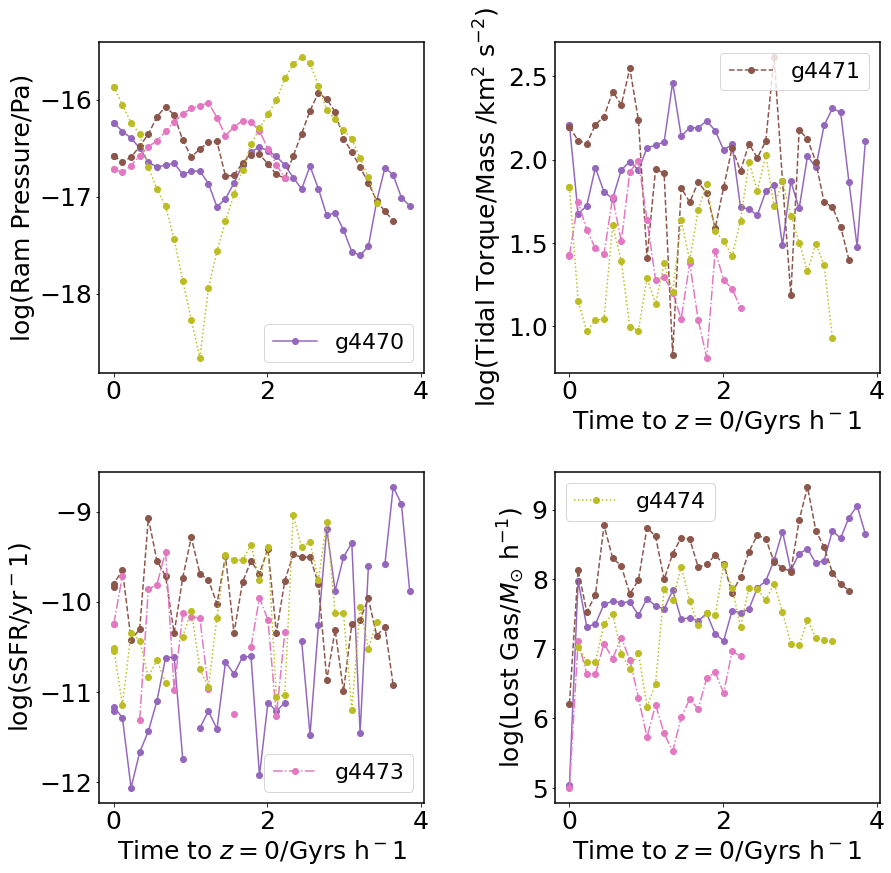

In [42]:
# all together
pl.figure(figsize=(14,14))

pl.subplots_adjust(wspace=0.4, hspace=0.3)

pl.subplot(2, 2, 1)
pl.plot(Time_4470, np.log10(RP_4470), marker='o', ls='-', label='g4470', color='tab:purple')
pl.plot(Time_4471, np.log10(RP_4471), marker='o', ls='--', color='tab:brown')
pl.plot(Time_4473, np.log10(RP_4473), marker='o', ls='-.', color='tab:pink')
pl.plot(Time_4474, np.log10(RP_4474), marker='o', ls=':', color='tab:olive')

pl.legend(loc='best')
pl.ylabel('log(Ram Pressure/Pa)')

pl.subplot(2, 2, 2)
pl.plot(Time_4470, np.log10(TSt_4470/gMass_4470), marker='o', ls='-',  color='tab:purple')
pl.plot(Time_4471, np.log10(TSt_4471/gMass_4471), marker='o', ls='--', label='g4471', color='tab:brown')
pl.plot(Time_4473, np.log10(TSt_4473/gMass_4473), marker='o', ls='-.', color='tab:pink')
pl.plot(Time_4474, np.log10(TSt_4474/gMass_4474), marker='o', ls=':', color='tab:olive')

pl.legend(loc='best')
pl.ylabel('log(Tidal Torque/Mass /km$^{2}$ s$^{-2}$)')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')

pl.subplot(2, 2, 3)
pl.plot(Time_4470, np.log10(SFR_4470/starMass_4470), marker='o', ls='-', color='tab:purple')
pl.plot(Time_4471, np.log10(SFR_4471/starMass_4471), marker='o', ls='--', color='tab:brown')
pl.plot(Time_4473, np.log10(SFR_4473/starMass_4473), marker='o', ls='-.', label='g4473', color='tab:pink')
pl.plot(Time_4474, np.log10(SFR_4474/starMass_4474), marker='o', ls=':', color='tab:olive')

pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('log(sSFR/yr$^-1)$')


pl.subplot(2, 2, 4)
pl.plot(Time_4470, np.log10(Gas_4470), marker='o', ls='-', color='tab:purple')
pl.plot(Time_4471, np.log10(Gas_4471), marker='o', ls='--', color='tab:brown')
pl.plot(Time_4473, np.log10(Gas_4473), marker='o', ls='-.', color='tab:pink')
pl.plot(Time_4474, np.log10(Gas_4474), marker='o', ls=':', label='g4474', color='tab:olive')

pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^-1$')
pl.ylabel('log(Lost Gas/$M_{\odot}$ h$^{-1}$)')

In [43]:
# local mimimums, a lots of them
def LocalMin(dist, Time):
    i = []
    for j, d in enumerate(dist):
        if j!=0 and j!=dist.size-1:
            if d<dist[j+1] and d<dist[j-1]:
                i.append(j)
    i = np.array(i)
    if dist[0]<dist[i].min():
        i = list(i)
        i.append(0)
        i = np.array(i)
    return Time[i], dist[i]

In [44]:
mtime_4338, mdist_4338 = LocalMin(dist_4338, Time_4338)
mtime_4339, mdist_4339 = LocalMin(dist_4339, Time_4339)
mtime_4341, mdist_4341 = LocalMin(dist_4341, Time_4341)
mtime_4343, mdist_4343 = LocalMin(dist_4343, Time_4343)

mtime_4470, mdist_4470 = LocalMin(dist_4470, Time_4470)
mtime_4471, mdist_4471 = LocalMin(dist_4471, Time_4471)
mtime_4473, mdist_4473 = LocalMin(dist_4473, Time_4473)
mtime_4474, mdist_4474 = LocalMin(dist_4474, Time_4474)

In [45]:
snapMerger = 101
zmerger = sim['SnapNumber_{}/Header/Redshift'.format(snapMerger)][()]
TimeMerger = Cosmo.lookback_time(zmerger).value

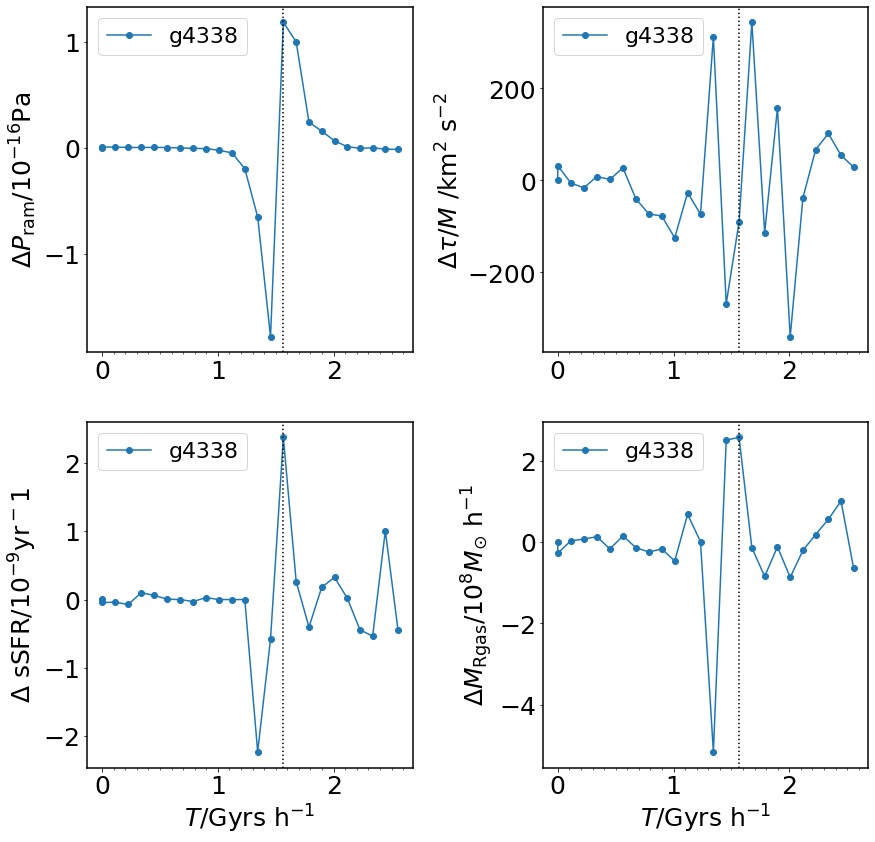

In [46]:
pl.figure(figsize=(14,14))

pl.subplots_adjust(wspace=0.4, hspace=0.2)

ax = pl.subplot(2, 2, 1)
pl.plot(Time_4338[:-1], DeltaRP_4338/1e-16, marker='o', ls='-', label='g4338', color='tab:blue')
pl.legend(loc='best')
pl.ylabel('$\Delta P_{\\rm ram}/10^{-16}$Pa')

ylim = pl.ylim()
for t in mtime_4338:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 2.6, 27), minor=True)

ax = pl.subplot(2, 2, 2)
pl.plot(Time_4338[:-1], DeltaTT_4338, marker='o', ls='-', label='g4338', color='tab:blue')
pl.legend(loc='best')
pl.ylabel('$\Delta \\tau/M$ /km$^{2}$ s$^{-2}$')
# pl.xlabel('Time to $z=0$/Gyrs h$^{-1}$')

ylim = pl.ylim()
for t in mtime_4338:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 2.6, 27), minor=True)

ax = pl.subplot(2, 2, 3)
pl.plot(Time_4338[:-1], DeltaSFR_4338/1e-9, marker='o', ls='-', label='g4338', color='tab:blue')
pl.legend(loc='best')
pl.xlabel('$T$/Gyrs h$^{-1}$')
pl.ylabel('$\Delta$ sSFR/$10^{-9}$yr$^-1$')

ylim = pl.ylim()
for t in mtime_4338:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 2.6, 27), minor=True)

ax = pl.subplot(2, 2, 4)
pl.plot(Time_4338[:-1], DeltaMass_4338/1e8, marker='o', ls='-', label='g4338', color='tab:blue')
pl.legend(loc='best')
pl.xlabel('$T$/Gyrs h$^{-1}$')
pl.ylabel('$\Delta M_{\\rm Rgas}/10^{8}M_{\odot}$ h$^{-1}$')

ylim = pl.ylim()
for t in mtime_4338:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 2.6, 27), minor=True)

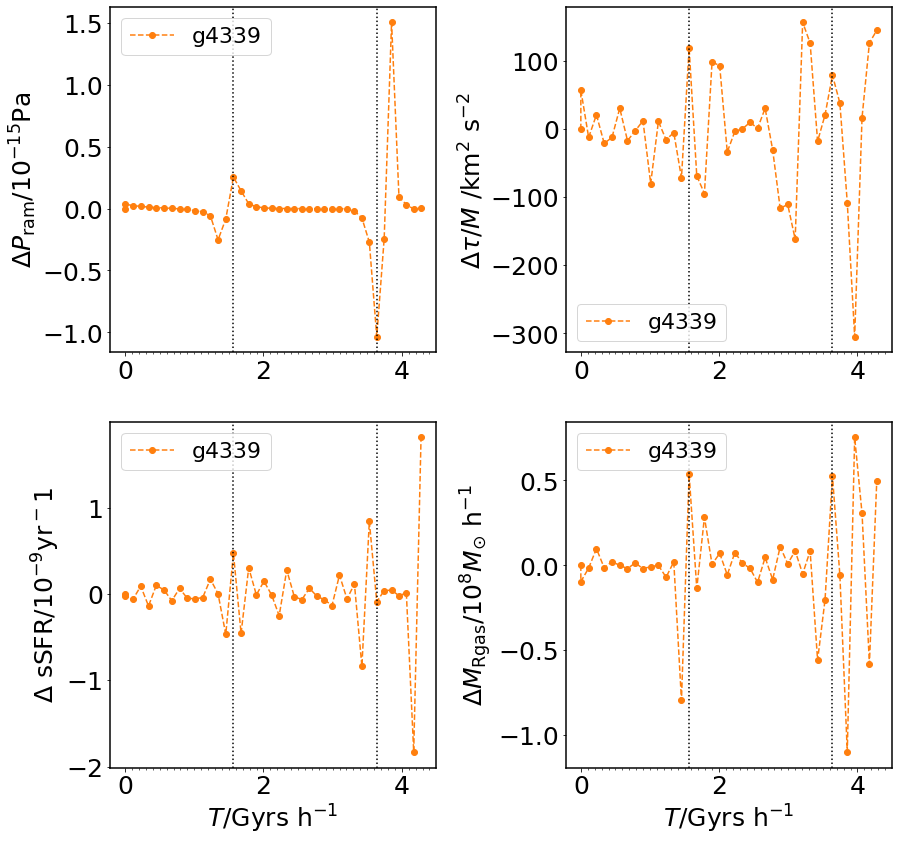

In [47]:
pl.figure(figsize=(14,14))

pl.subplots_adjust(wspace=0.4, hspace=0.2)

ax = pl.subplot(2, 2, 1)
pl.plot(Time_4339[:-1], DeltaRP_4339/1e-15, marker='o', ls='--', label='g4339', color='tab:orange')
pl.legend(loc='best')
pl.ylabel('$\Delta P_{\\rm ram}/10^{-15}$Pa')

ylim = pl.ylim()
for t in mtime_4339:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 4.4, 45), minor=True)

ax = pl.subplot(2, 2, 2)
pl.plot(Time_4339[:-1], DeltaTT_4339, marker='o', ls='--', label='g4339', color='tab:orange')
pl.legend(loc='best')
pl.ylabel('$\Delta\\tau/M$ /km$^{2}$ s$^{-2}$')
# pl.xlabel('Time to $z=0$/Gyrs h$^{-1}$')


ylim = pl.ylim()
for t in mtime_4339:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 4.4, 45), minor=True)

ax = pl.subplot(2, 2, 3)
pl.plot(Time_4339[:-1], DeltaSFR_4339/1e-9, marker='o', ls='--', label='g4339', color='tab:orange')
pl.legend(loc='best')
pl.xlabel('$T$/Gyrs h$^{-1}$')
pl.ylabel('$\Delta$ sSFR/$10^{-9}$yr$^-1$')

ylim = pl.ylim()
for t in mtime_4339:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 4.4, 45), minor=True)

ax = pl.subplot(2, 2, 4)
pl.plot(Time_4339[:-1], DeltaMass_4339/1e8, marker='o', ls='--', label='g4339', color='tab:orange')
pl.legend(loc='best')
pl.xlabel('$T$/Gyrs h$^{-1}$')
pl.ylabel('$\Delta M_{\\rm Rgas}/10^{8}M_{\odot}$ h$^{-1}$')

ylim = pl.ylim()
for t in mtime_4339:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 4.4, 45), minor=True)

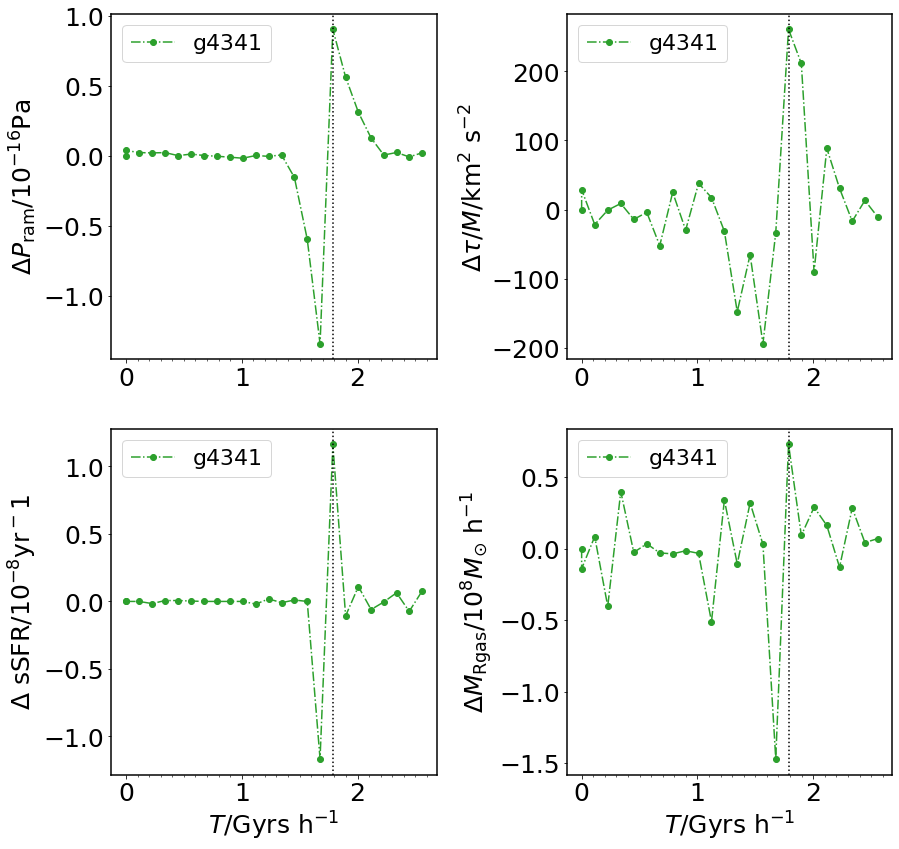

In [48]:
pl.figure(figsize=(14,14))

pl.subplots_adjust(wspace=0.4, hspace=0.2)

ax = pl.subplot(2, 2, 1)
pl.plot(Time_4341[:-1], DeltaRP_4341/1e-16, marker='o', ls='-.', label='g4341', color='tab:green')
pl.legend(loc='best')
pl.ylabel('$\Delta P_{\\rm ram}/10^{-16}$Pa')

ylim = pl.ylim()
for t in mtime_4341:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 2.6, 27), minor=True)

ax = pl.subplot(2, 2, 2)
pl.plot(Time_4341[:-1], DeltaTT_4341, marker='o', ls='-.', label='g4341', color='tab:green')
pl.legend(loc='best')
pl.ylabel('$\Delta \\tau/M$/km$^{2}$ s$^{-2}$')
# pl.xlabel('Time to $z=0$/Gyrs h$^{-1}$')

ylim = pl.ylim()
for t in mtime_4341:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 2.6, 27), minor=True)

ax = pl.subplot(2, 2, 3)
pl.plot(Time_4341[:-1], DeltaSFR_4341/1e-8, marker='o', ls='-.', label='g4341', color='tab:green')
pl.legend(loc='best')
pl.xlabel('$T$/Gyrs h$^{-1}$')
pl.ylabel('$\Delta$ sSFR/$10^{-8}$yr$^-1$')

ylim = pl.ylim()
for t in mtime_4341:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 2.6, 27), minor=True)

ax = pl.subplot(2, 2, 4)
pl.plot(Time_4341[:-1], DeltaMass_4341/1e8, marker='o', ls='-.', label='g4341', color='tab:green')
pl.legend(loc='best')
pl.xlabel('$T$/Gyrs h$^{-1}$')
pl.ylabel('$\Delta M_{\\rm Rgas}/10^{8}M_{\odot}$ h$^{-1}$')

ylim = pl.ylim()
for t in mtime_4341:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 2.6, 27), minor=True)

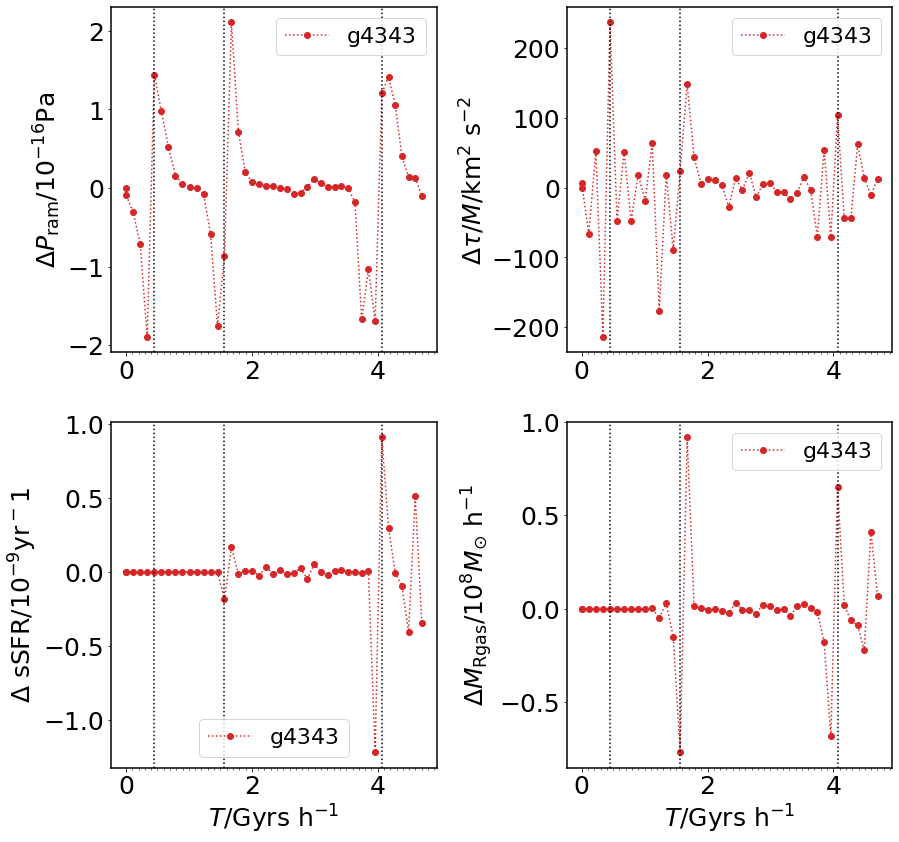

In [49]:
pl.figure(figsize=(14,14))

pl.subplots_adjust(wspace=0.4, hspace=0.2)

ax = pl.subplot(2, 2, 1)
pl.plot(Time_4343[:-1], DeltaRP_4343/1e-16, marker='o', ls=':', label='g4343', color='tab:red')
pl.legend(loc='best')
pl.ylabel('$\Delta P_{\\rm ram}/10^{-16}$Pa')

ylim = pl.ylim()
for t in mtime_4343:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 4.9, 50), minor=True)

ax = pl.subplot(2, 2, 2)
pl.plot(Time_4343[:-1], DeltaTT_4343, marker='o', ls=':', label='g4343', color='tab:red')
pl.legend(loc='best')
pl.ylabel('$\Delta \\tau/M$/km$^{2}$ s$^{-2}$')
# pl.xlabel('Time to $z=0$/Gyrs h$^{-1}$')

ylim = pl.ylim()
for t in mtime_4343:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 4.9, 50), minor=True)

ax = pl.subplot(2, 2, 3)
pl.plot(Time_4343[:-1], DeltaSFR_4343/1e-9, marker='o', ls=':', label='g4343', color='tab:red')
pl.legend(loc='best')
pl.xlabel('$T$/Gyrs h$^{-1}$')
pl.ylabel('$\Delta$ sSFR/$10^{-9}$yr$^-1$')

ylim = pl.ylim()
for t in mtime_4343:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 4.9, 50), minor=True)

ax = pl.subplot(2, 2, 4)
pl.plot(Time_4343[:-1], DeltaMass_4343/1e8, marker='o', ls=':', label='g4343', color='tab:red')
pl.legend(loc='best')
pl.xlabel('$T$/Gyrs h$^{-1}$')
pl.ylabel('$\Delta M_{\\rm Rgas}/10^{8}M_{\odot}$ h$^{-1}$')

ylim = pl.ylim()
for t in mtime_4343:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 4.9, 50), minor=True)

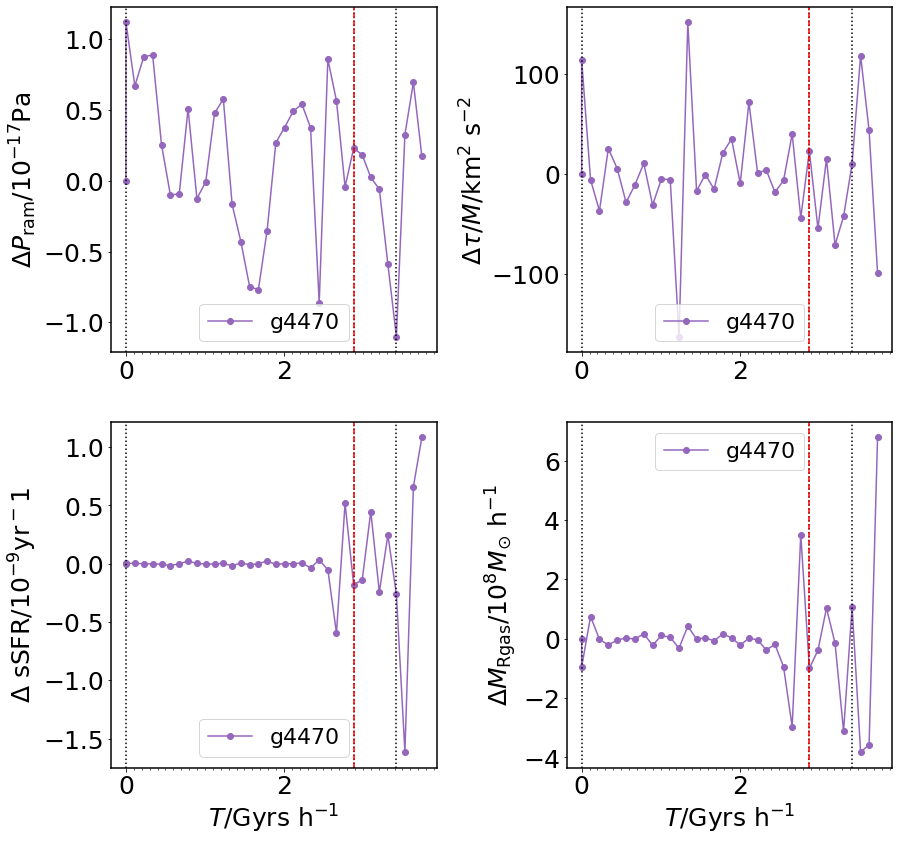

In [50]:
pl.figure(figsize=(14,14))

pl.subplots_adjust(wspace=0.4, hspace=0.2)

ax = pl.subplot(2, 2, 1)
pl.plot(Time_4470[:-1], DeltaRP_4470/1e-17, marker='o', ls='-', label='g4470', color='tab:purple')
pl.legend(loc='best')
pl.ylabel('$\Delta P_{\\rm ram}/10^{-17}$Pa')

ylim = pl.ylim()
for t in mtime_4470:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')

pl.plot([TimeMerger, TimeMerger], [ylim[0], ylim[1]], ls='--', color='red')
    
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 3.9, 40), minor=True)

ax = pl.subplot(2, 2, 2)
pl.plot(Time_4470[:-1], DeltaTT_4470, marker='o', ls='-', label='g4470', color='tab:purple')
pl.legend(loc='best')
pl.ylabel('$\Delta \\tau/M$/km$^{2}$ s$^{-2}$')
# pl.xlabel('Time to $z=0$/Gyrs h$^{-1}$')

ylim = pl.ylim()
for t in mtime_4470:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
    
pl.plot([TimeMerger, TimeMerger], [ylim[0], ylim[1]], ls='--', color='red')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 3.9, 40), minor=True)

ax = pl.subplot(2, 2, 3)
pl.plot(Time_4470[:-1], DeltaSFR_4470/1e-9, marker='o', ls='-', label='g4470', color='tab:purple')
pl.legend(loc='best')
pl.xlabel('$T$/Gyrs h$^{-1}$')
pl.ylabel('$\Delta$ sSFR/$10^{-9}$yr$^-1$')

ylim = pl.ylim()
for t in mtime_4470:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
    
pl.plot([TimeMerger, TimeMerger], [ylim[0], ylim[1]], ls='--', color='red')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 3.9, 40), minor=True)

ax = pl.subplot(2, 2, 4)
pl.plot(Time_4470[:-1], DeltaMass_4470/1e8, marker='o', ls='-', label='g4470', color='tab:purple')
pl.legend(loc='best')
pl.xlabel('$T$/Gyrs h$^{-1}$')
pl.ylabel('$\Delta M_{\\rm Rgas}/10^{8}M_{\odot}$ h$^{-1}$')

ylim = pl.ylim()
for t in mtime_4470:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
    
pl.plot([TimeMerger, TimeMerger], [ylim[0], ylim[1]], ls='--', color='red')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 3.9, 40), minor=True)

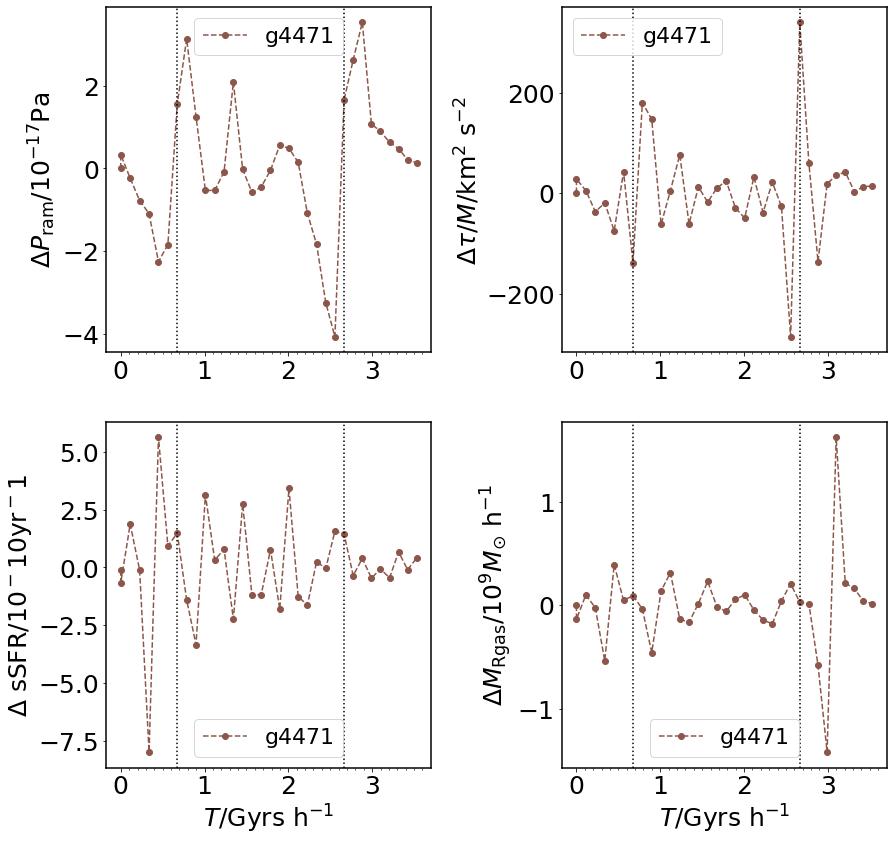

In [51]:
pl.figure(figsize=(14,14))

pl.subplots_adjust(wspace=0.4, hspace=0.2)

ax = pl.subplot(2, 2, 1)
pl.plot(Time_4471[:-1], DeltaRP_4471/1e-17, marker='o', ls='--', label='g4471', color='tab:brown')
pl.legend(loc='best')
pl.ylabel('$\Delta P_{\\rm ram}/10^{-17}$Pa')

ylim = pl.ylim()
for t in mtime_4471:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 3.6, 37), minor=True)

ax = pl.subplot(2, 2, 2)
pl.plot(Time_4471[:-1], DeltaTT_4471, marker='o', ls='--', label='g4471', color='tab:brown')
pl.legend(loc='best')
pl.ylabel('$\Delta \\tau/M$/km$^{2}$ s$^{-2}$')
# pl.xlabel('Time to $z=0$/Gyrs h$^{-1}$')

ylim = pl.ylim()
for t in mtime_4471:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 3.6, 37), minor=True)

ax = pl.subplot(2, 2, 3)
pl.plot(Time_4471[:-1], DeltaSFR_4471/1e-10, marker='o', ls='--', label='g4471', color='tab:brown')
pl.legend(loc='best')
pl.xlabel('$T$/Gyrs h$^{-1}$')
pl.ylabel('$\Delta$ sSFR/$10^-10$yr$^-1$')

ylim = pl.ylim()
for t in mtime_4471:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 3.6, 37), minor=True)

ax = pl.subplot(2, 2, 4)
pl.plot(Time_4471[:-1], DeltaMass_4471/1e9, marker='o', ls='--', label='g4471', color='tab:brown')
pl.legend(loc='best')
pl.xlabel('$T$/Gyrs h$^{-1}$')
pl.ylabel('$\Delta M_{\\rm Rgas}/10^{9}M_{\odot}$ h$^{-1}$')

ylim = pl.ylim()
for t in mtime_4471:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 3.6, 37), minor=True)

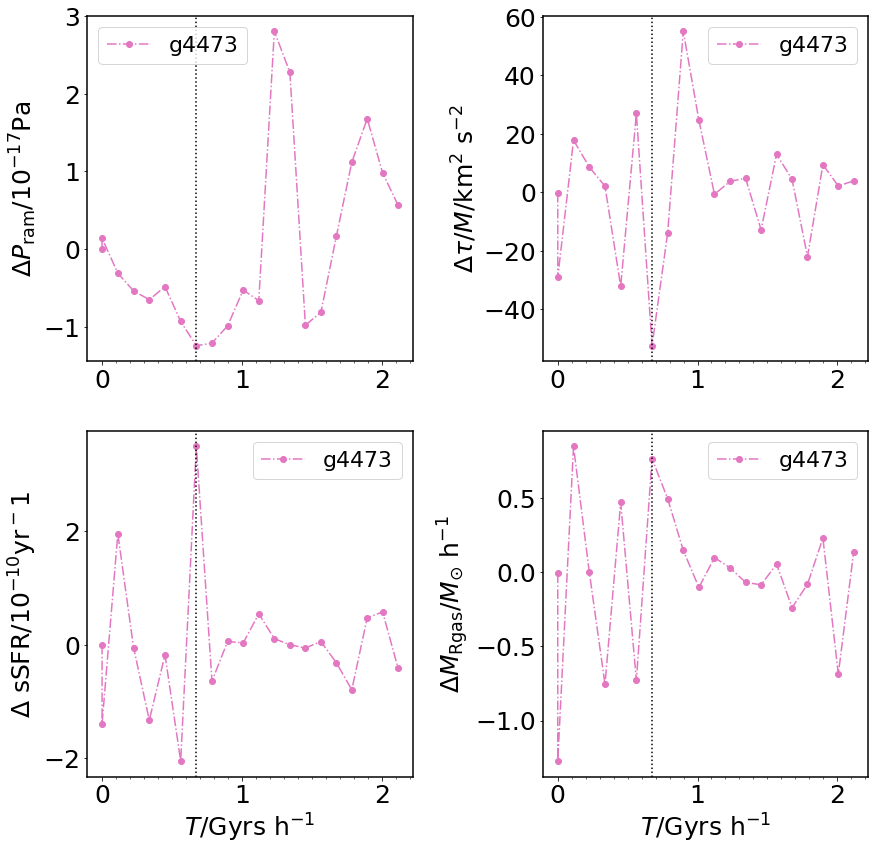

In [52]:
pl.figure(figsize=(14,14))

pl.subplots_adjust(wspace=0.4, hspace=0.2)

ax = pl.subplot(2, 2, 1)
pl.plot(Time_4473[:-1], DeltaRP_4473/1e-17, marker='o', ls='-.', label='g4473', color='tab:pink')
pl.legend(loc='best')
pl.ylabel('$\Delta P_{\\rm ram}/10^{-17}$Pa')

ylim = pl.ylim()
for t in mtime_4473:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 2.2, 23), minor=True)

ax = pl.subplot(2, 2, 2)
pl.plot(Time_4473[:-1], DeltaTT_4473, marker='o', ls='-.', label='g4473', color='tab:pink')
pl.legend(loc='best')
pl.ylabel('$\Delta \\tau/M$/km$^{2}$ s$^{-2}$')
# pl.xlabel('Time to $z=0$/Gyrs h$^{-1}$')

ylim = pl.ylim()
for t in mtime_4473:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 2.2, 23), minor=True)

ax = pl.subplot(2, 2, 3)
pl.plot(Time_4473[:-1], DeltaSFR_4473/1e-10, marker='o', ls='-.', label='g4473', color='tab:pink')
pl.legend(loc='best')
pl.xlabel('$T$/Gyrs h$^{-1}$')
pl.ylabel('$\Delta$ sSFR/$10^{-10}$yr$^-1$')

ylim = pl.ylim()
for t in mtime_4473:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 2.2, 23), minor=True)

ax = pl.subplot(2, 2, 4)
pl.plot(Time_4473[:-1], DeltaMass_4473/1e7, marker='o', ls='-.', label='g4473', color='tab:pink')
pl.legend(loc='best')
pl.xlabel('$T$/Gyrs h$^{-1}$')
pl.ylabel('$\Delta M_{\\rm Rgas}/M_{\odot}$ h$^{-1}$')

ylim = pl.ylim()
for t in mtime_4473:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 2.2, 23), minor=True)

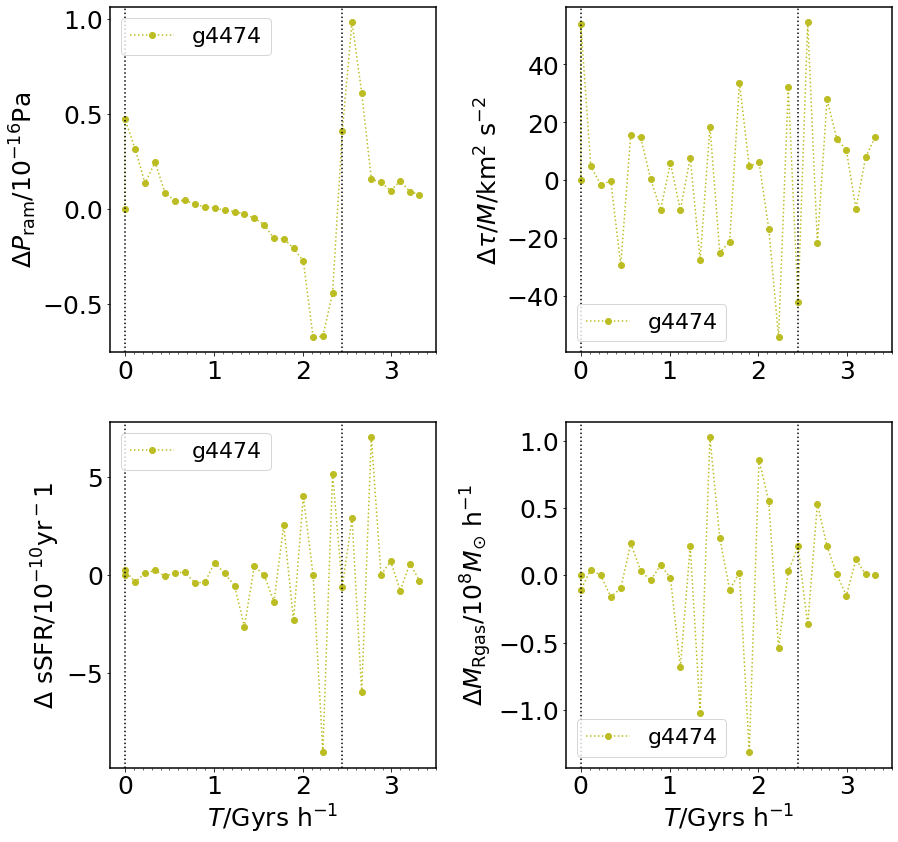

In [53]:
pl.figure(figsize=(14,14))

pl.subplots_adjust(wspace=0.4, hspace=0.2)

ax = pl.subplot(2, 2, 1)
pl.plot(Time_4474[:-1], DeltaRP_4474/1e-16, marker='o', ls=':', label='g4474', color='tab:olive')
pl.legend(loc='best')
pl.ylabel('$\Delta P_{\\rm ram}/10^{-16}$Pa')

ylim = pl.ylim()
for t in mtime_4474:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 3.5, 36), minor=True)

ax = pl.subplot(2, 2, 2)
pl.plot(Time_4474[:-1], DeltaTT_4474, marker='o', ls=':', label='g4474', color='tab:olive')
pl.legend(loc='best')
pl.ylabel('$\Delta \\tau/M$/km$^{2}$ s$^{-2}$')
# pl.xlabel('Time to $z=0$/Gyrs h$^{-1}$')

ylim = pl.ylim()
for t in mtime_4474:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 3.5, 36), minor=True)

ax = pl.subplot(2, 2, 3)
pl.plot(Time_4474[:-1], DeltaSFR_4474/1e-10, marker='o', ls=':', label='g4474', color='tab:olive')
pl.legend(loc='best')
pl.xlabel('$T$/Gyrs h$^{-1}$')
pl.ylabel('$\Delta$ sSFR/$10^{-10}$yr$^-1$')

ylim = pl.ylim()
for t in mtime_4474:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 3.5, 36), minor=True)

ax = pl.subplot(2, 2, 4)
pl.plot(Time_4474[:-1], DeltaMass_4474/1e8, marker='o', ls=':', label='g4474', color='tab:olive')
pl.legend(loc='best')
pl.xlabel('$T$/Gyrs h$^{-1}$')
pl.ylabel('$\Delta M_{\\rm Rgas}/10^{8}M_{\odot}$ h$^{-1}$')

ylim = pl.ylim()
for t in mtime_4474:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

ax.set_xticks(np.linspace(0, 3.5, 36), minor=True)

In [54]:
#ok, now the densities one, I think, maybe separate by halo. I dont know,maybe it is confusing
Msun = 1.988*1e30
kpc = 3.086*1e19

# a bunch of constants
UnitMass_in_g = 1.989e+43
UnitTime_in_s = 3.08568e+16
UnitVelocity_in_cm_per_s = 100000
UnitDensity_in_cgs = 6.7699e-22
UnitEnergy_in_cgs = 1.989e+53
GAMMA_MINUS1 = 2./3.
PROTONMASS = 1.6726e-24
BOLTZMANN = 1.3806e-16    

HMass = 1.00794
FeMass = 55.845
OMass = 15.9994
NfeNhe_sun = -4.5 # grevesse & saundall 98
NoNfe_sun = 1.33 # same

def tempFromMass(Mass, Abund, IE, ne1):
    XH = Abund[:,6]/Mass
    yHelium = (1. - XH)/(4.*XH)
    mu = (1 + 4.* yHelium)/ (1.+ yHelium + ne1 )
    temp = GAMMA_MINUS1 * IE * mu * 1.6726 / 1.3806 * 1.e-8 # / BOLTZMANN  * PROTONMASS
    temp = temp * 1e10 #   UnitEnergy_in_cgs / UnitMass_in_g;
    return temp

def getDens_group(group):
    r200 = sim['SnapNumber_128/Groups/Group_R_Crit200'][group]
    offGroup = sim['SnapNumber_128/Groups/PartType0/Offsets'][group].astype('int')
    posGroup = sim['SnapNumber_128/Groups/GroupCM'][group]
    postPart = sim['SnapNumber_128/PartType0/Coordinates'][offGroup[0]:offGroup[1]]
    
    x, y, z = postPart[:,0] - posGroup[0], postPart[:,1] - posGroup[1], postPart[:,2] - posGroup[2]
    r = np.sqrt(x**2+y**2+z**2)
    
    IE = sim['SnapNumber_128/PartType0/InternalEnergy'][offGroup[0]:offGroup[1]]
    Mass = sim['SnapNumber_128/PartType0/Masses'][offGroup[0]:offGroup[1]]
    Abund = sim['SnapNumber_128/PartType0/Abundances'][offGroup[0]:offGroup[1]]
    ne1 = sim['SnapNumber_128/PartType0/ElectronAbundance'][offGroup[0]:offGroup[1]]
    
    temp = tempFromMass(Mass, Abund, IE, ne1)
    iK = np.where(temp>1e6)
    
    
    MassK = Mass[iK]
    rK = r[iK]

    SMass, Borders, stuff = sp.binned_statistic(rK, MassK, bins=20, range=(0, r200), statistic='sum')
    Vols = 4/3*np.pi*(Borders[1:]**3.-Borders[:-1]**3.)
        
    Dens = SMass*1e10/Vols # in M_sun/kcp^3
    Dens = Dens*Msun/(kpc**3.) # in kg/m^3, because, well
    Xs = 0.5*(Borders[1:]+Borders[:-1])
    Xs = Xs/r200
    return Xs, Dens

lim = 10**(-28.3)

Lim = lim/1000.*1e2*1e2*1e2
np.log10(Lim)

-25.3

In [55]:
Xs_4671, Dens_4671 = getDens_group(4671)
Xs_4672, Dens_4672 = getDens_group(4672)

([<matplotlib.axis.XTick at 0x7f54029fe1d0>,
 <a list of 6 Text major ticklabel objects>)

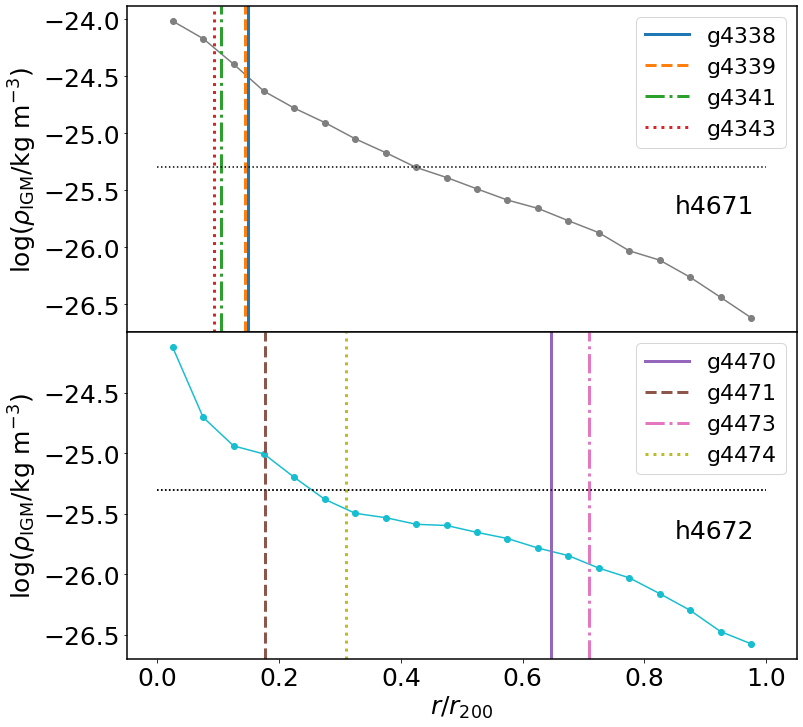

In [56]:
pl.figure(figsize=(12,12))

pl.subplots_adjust(hspace=0.)

pl.subplot(2,1,1)

pl.plot(Xs_4671, np.log10(Dens_4671), marker='o', color='tab:grey')

ylim = pl.ylim()
pl.plot([mdist_4338.min(), mdist_4338.min()], [ylim[0], ylim[1]], ls='-', color='tab:blue', label='g4338', lw=3)
pl.plot([mdist_4339.min(), mdist_4339.min()], [ylim[0], ylim[1]], ls='--', color='tab:orange', label='g4339', lw=3)
pl.plot([mdist_4341.min(), mdist_4341.min()], [ylim[0], ylim[1]], ls='-.', color='tab:green', label='g4341', lw=3)
pl.plot([mdist_4343.min(), mdist_4343.min()], [ylim[0], ylim[1]], ls=':', color='tab:red', label='g4343', lw=3)

pl.plot([0., 1.], [np.log10(Lim),np.log10(Lim)], ls=':', color='black')

pl.text(0.85, -25.7, 'h4671')

pl.legend(loc='best')
pl.ylim(ylim)

#pl.xlabel('Distance to the centre$/r_{200}$')
pl.ylabel('log($\\rho_{\\rm IGM}$/kg m$^{-3}$)')

pl.xticks([0.,0.2,0.4,0.6,0.8,1.0], ['', '', '', '', '', ''])

pl.subplot(2, 1, 2)

pl.plot(Xs_4672, np.log10(Dens_4672), marker='o', color='tab:cyan')

pl.plot([0., 1.], [np.log10(Lim),np.log10(Lim)], ls=':', color='black')

ylim = pl.ylim()
pl.plot([mdist_4470.min(), mdist_4470.min()], [ylim[0], ylim[1]], ls='-', color='tab:purple', label='g4470', lw=3)
pl.plot([mdist_4471.min(), mdist_4471.min()], [ylim[0], ylim[1]], ls='--', color='tab:brown', label='g4471', lw=3)
pl.plot([mdist_4473.min(), mdist_4473.min()], [ylim[0], ylim[1]], ls='-.', color='tab:pink', label='g4473', lw=3)
pl.plot([mdist_4474.min(), mdist_4474.min()], [ylim[0], ylim[1]], ls=':', color='tab:olive', label='g4474', lw=3)

pl.plot([0., 1.], [np.log10(Lim),np.log10(Lim)], ls=':', color='black')
pl.text(0.85, -25.7, 'h4672')

pl.legend(loc=1)
pl.ylim(ylim)

pl.xlabel('$r/r_{200}$')
pl.ylabel('log($\\rho_{\\rm IGM}$/kg m$^{-3}$)')

pl.xticks([0.,0.2,0.4,0.6,0.8,1.0])

In [57]:
# i gonne see if i smooth a little. lets take a look at that.
def smoother(TT, sSFR, RP, Gas, n):
    I = np.arange(TT.size)
    
    newTT, newsSFR, newRP, newGas = np.zeros(I.size), np.zeros(I.size), np.zeros(I.size), np.zeros(I.size)
    for i in I:
        itemp = np.arange(i-n, i+n+1)
        itemp = itemp[np.where((itemp>=0) & (itemp<I[-1]))]
        tTT = TT[itemp]
        tsSFR = sSFR[itemp]
        tRP = RP[itemp]
        tGas = Gas[itemp]
        
        tTT = tTT[np.where((np.isnan(tTT)==False) & (np.isinf(tTT)==False))]
        tsSFR = tsSFR[np.where((np.isnan(tsSFR)==False) & (np.isinf(tsSFR)==False))]
        tRP = tRP[np.where((np.isnan(tRP)==False) & (np.isinf(tRP)==False))]
        tGas = tGas[np.where((np.isnan(tGas)==False) & (np.isinf(tGas)==False))]
        
        newTT[i] = np.mean(tTT)
        newsSFR[i] = np.mean(tsSFR)
        newRP[i] = np.mean(tRP)
        newGas[i] = np.mean(tGas)
        
    return newTT, newsSFR, newRP, newGas

In [58]:
n = 3 # idk, maybe one
newTT_4338, newsSFR_4338, newRP_4338, newGas_4338 = smoother(DeltaTT_4338, DeltaSFR_4338, DeltaRP_4338, DeltaMass_4338, n)
newTT_4339, newsSFR_4339, newRP_4339, newGas_4339 = smoother(DeltaTT_4339, DeltaSFR_4339, DeltaRP_4339, DeltaMass_4339, n)
newTT_4341, newsSFR_4341, newRP_4341, newGas_4341 = smoother(DeltaTT_4341, DeltaSFR_4341, DeltaRP_4341, DeltaMass_4341, n)
newTT_4343, newsSFR_4343, newRP_4343, newGas_4343 = smoother(DeltaTT_4343, DeltaSFR_4343, DeltaRP_4343, DeltaMass_4343, n)

newTT_4470, newsSFR_4470, newRP_4470, newGas_4470 = smoother(DeltaTT_4470, DeltaSFR_4470, DeltaRP_4470, DeltaMass_4470, n)
newTT_4471, newsSFR_4471, newRP_4471, newGas_4471 = smoother(DeltaTT_4471, DeltaSFR_4471, DeltaRP_4471, DeltaMass_4471, n)
newTT_4473, newsSFR_4473, newRP_4473, newGas_4473 = smoother(DeltaTT_4473, DeltaSFR_4473, DeltaRP_4473, DeltaMass_4473, n)
newTT_4474, newsSFR_4474, newRP_4474, newGas_4474 = smoother(DeltaTT_4474, DeltaSFR_4474, DeltaRP_4474, DeltaMass_4474, n)

(-85314341.4, 65059649.4)

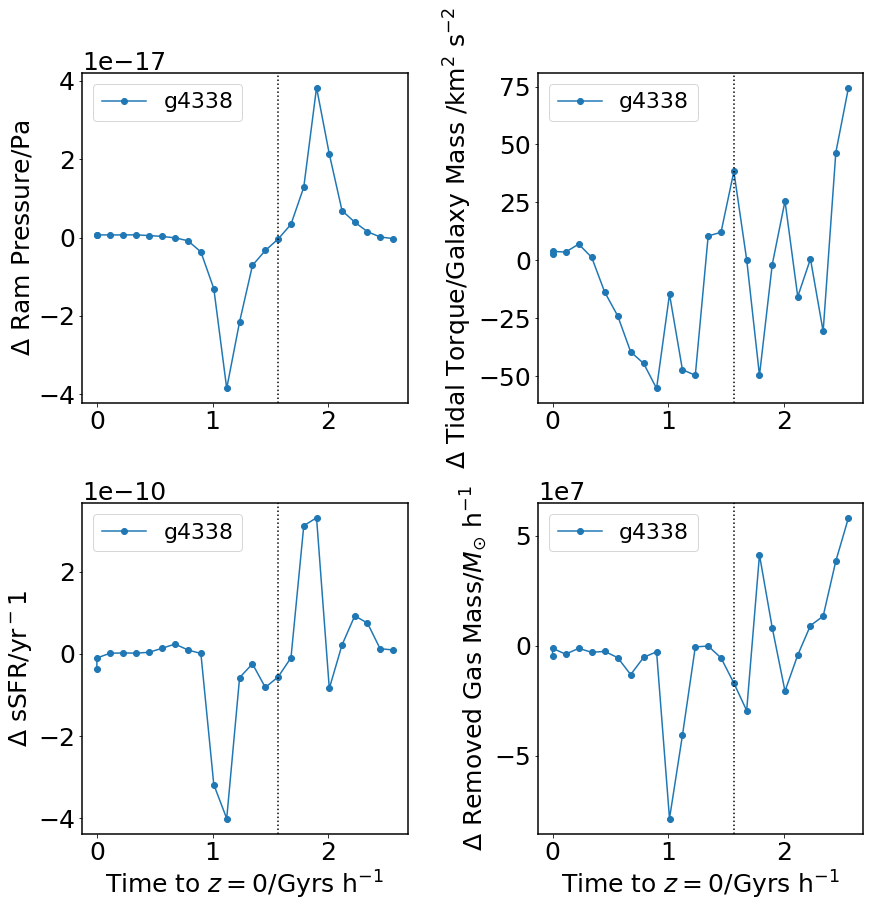

In [59]:
pl.figure(figsize=(14,14))

pl.subplots_adjust(wspace=0.4, hspace=0.3)

pl.subplot(2, 2, 1)
pl.plot(Time_4338[:-1], newRP_4338, marker='o', ls='-', label='g4338', color='tab:blue')
pl.legend(loc='best')
pl.ylabel('$\Delta$ Ram Pressure/Pa')

ylim = pl.ylim()
for t in mtime_4338:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

pl.subplot(2, 2, 2)
pl.plot(Time_4338[:-1], newTT_4338, marker='o', ls='-', label='g4338', color='tab:blue')
pl.legend(loc='best')
pl.ylabel('$\Delta$ Tidal Torque/Galaxy Mass /km$^{2}$ s$^{-2}$')
# pl.xlabel('Time to $z=0$/Gyrs h$^{-1}$')

ylim = pl.ylim()
for t in mtime_4338:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

pl.subplot(2, 2, 3)
pl.plot(Time_4338[:-1], newsSFR_4338, marker='o', ls='-', label='g4338', color='tab:blue')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^{-1}$')
pl.ylabel('$\Delta$ sSFR/yr$^-1$')

ylim = pl.ylim()
for t in mtime_4338:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

pl.subplot(2, 2, 4)
pl.plot(Time_4338[:-1], newGas_4338, marker='o', ls='-', label='g4338', color='tab:blue')
pl.legend(loc='best')
pl.xlabel('Time to $z=0$/Gyrs h$^{-1}$')
pl.ylabel('$\Delta$ Removed Gas Mass/$M_{\odot}$ h$^{-1}$')

ylim = pl.ylim()
for t in mtime_4338:
    pl.plot([t, t], [ylim[0], ylim[1]], ls=':', color='black')
pl.ylim(ylim)

In [60]:
sim['SnapNumber_128/PartType0'].keys()

<KeysViewHDF5 ['Abundances', 'BindingEnergy', 'Circularity', 'Coordinates', 'Density', 'ElectronAbundance', 'Esn', 'EsnCold', 'GroupNumber', 'InternalEnergy', 'Masses', 'NeutralHydrogenAbundance', 'ParticleIDs', 'Potential', 'SmoothingLength', 'SpecificAngularMomentum', 'StarFormationRate', 'SubFindNumber', 'SubGroupNumber', 'Velocities']>

In [61]:
SFR_4338[0]/starMass_4338[0], SFR_4339[0]/starMass_4339[0],SFR_4341[0]/starMass_4341[0],SFR_4343[0]/starMass_4343[0]

(1.505745299085151e-11, 1.4658250351960613e-11, 0.0, 0.0)

In [62]:
SFR_4470[0]/starMass_4470[0], SFR_4471[0]/starMass_4471[0],SFR_4473[0]/starMass_4473[0],SFR_4474[0]/starMass_4474[0]

(6.207797384235542e-12,
 1.4573343039101298e-10,
 5.647576213330644e-11,
 2.868825227720902e-11)

In [63]:
i1_4338 = np.where(dist_4338<=0.2)
i2_4338 = np.where((dist_4338>0.2) & (dist_4338<1.))

print(np.mean(RP_4338[i1_4338])/np.mean(RP_4338[i2_4338]))

i1_4339 = np.where(dist_4339<=0.2)
i2_4339 = np.where((dist_4339>0.2) & (dist_4339<1.))

print(np.mean(RP_4339[i1_4339])/np.mean(RP_4339[i2_4339]))

i1_4341 = np.where(dist_4341<=0.2)
i2_4341 = np.where((dist_4341>0.2) & (dist_4341<1.))

print(np.mean(RP_4341[i1_4341])/np.mean(RP_4341[i2_4341]))

i1_4343 = np.where(dist_4343<=0.2)
i2_4343 = np.where((dist_4343>0.2) & (dist_4343<1.))

print(np.mean(RP_4343[i1_4343])/np.mean(RP_4343[i2_4343]))

6.5199348731886975
2.366913184706429
6.286134714917509
2.7066078561510207


In [64]:
i1_4470 = np.where(dist_4470<=0.2)
i2_4470 = np.where((dist_4470>0.2) & (dist_4470<1.))

print(np.mean(RP_4470[i1_4470])/np.mean(RP_4470[i2_4470]))

i1_4471 = np.where(dist_4471<=0.2)
i2_4471 = np.where((dist_4471>0.2) & (dist_4471<1.))

print(np.mean(RP_4471[i1_4471])/np.mean(RP_4471[i2_4471]))

i1_4473 = np.where(dist_4473<=0.2)
i2_4473 = np.where((dist_4473>0.2) & (dist_4473<1.))

print(np.mean(RP_4473[i1_4473])/np.mean(RP_4473[i2_4473]))

i1_4474 = np.where(dist_4474<=0.2)
i2_4474 = np.where((dist_4474>0.2) & (dist_4474<1.))

print(np.mean(RP_4474[i1_4474])/np.mean(RP_4474[i2_4474]))

nan
1.3012402234054836
nan
nan


/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [65]:
np.mean([6.5199348731886975, 2.366913184706429, 6.286134714917509, 2.7066078561510207, 1.3012402234054836])

3.8361661704738275

In [66]:
np.median([6.5199348731886975, 2.366913184706429, 6.286134714917509, 2.7066078561510207, 1.3012402234054836])

2.7066078561510207